In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import xlsxwriter
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
sns.set_style('darkgrid')
from imblearn.combine import SMOTETomek
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn import tree

# Dataset1_TranscriptMahasiswa

Akan dilakukan pembersihan data dan EDA pada file excel 'Dataset1_TranscriptMahasiswa'

In [2]:
df=pd.read_excel('Dataset1_TranscriptMahasiswa.xlsx')
O=df.copy(deep=True)

In [3]:
#F=O.groupby('SEMESTER')[['SKS']].sum().reset_index()
#F[~F.SEMESTER.isin([1022,1122,1222,1322,1422,1522,1622,1722,1822])]

In [4]:
O['SEMESTER'].unique()

array([1011, 1021, 1111, 1121, 1211, 1221, 1311, 1321, 1322, 1122, 1222,
       1411, 1421, 1022, 1422, 1511, 1621, 1521, 1611, 1711, 1721, 1722,
       1522, 1821, 1811, 1622, 1822, 1911], dtype=int64)

# Data Understanding

In [5]:
def null(df):  #untuk menghitung prosentase data kosong
    return df.isna().sum(),df.info()

In [6]:
null(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30870 entries, 0 to 30869
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NIM       30870 non-null  int64  
 1   ANGKATAN  30870 non-null  int64  
 2   SEMESTER  30870 non-null  int64  
 3   KODE_MK   30870 non-null  object 
 4   NAMA_MK   30847 non-null  object 
 5   SKS       30870 non-null  int64  
 6   NILAI     30858 non-null  float64
 7   GRADE     30318 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 1.9+ MB


(NIM           0
 ANGKATAN      0
 SEMESTER      0
 KODE_MK       0
 NAMA_MK      23
 SKS           0
 NILAI        12
 GRADE       552
 dtype: int64,
 None)

In [7]:
df[df.NILAI.isna()]

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE
18866,9931,2015,1811,IS341,Sistem Basis Data,3,NaN,F
21965,12407,2015,1621,IS432,Pengantar E-Business,3,NaN,F
22633,13019,2016,1821,IS670,Audit Sistem Informasi,3,NaN,F
25920,19365,2017,1811,IS341,Sistem Basis Data,3,NaN,F
26030,19601,2017,1721,IS201,Proses Bisnis Korporat,3,NaN,F
26760,21116,2017,1711,IF110,Pengantar Teknologi Multimedia,3,NaN,F
26901,21159,2017,1821,UM321,Bahasa Inggris 3,2,NaN,F
27520,22742,2017,1721,IS230,Algoritma dan Pemrograman,3,NaN,F
27774,23564,2017,1721,IS230,Algoritma dan Pemrograman,3,NaN,F
29423,28446,2018,1821,IS220,Interaksi Manusia dan Komputer,3,NaN,F


In [8]:
df[df.duplicated(subset=['NIM','KODE_MK','GRADE','SEMESTER'],keep=False)]

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE
345,10110310011,2010,1011,EM100,Dasar-dasar Bisnis,3,71.0,B
346,10110310011,2010,1011,EM100,EM100 Dasar-dasar Bisnis,3,74.0,B
347,10110310011,2010,1011,EM180,EM180 Matematika Bisnis,3,73.0,B
348,10110310011,2010,1011,EM180,Matematika Bisnis,3,74.0,B
349,10110310011,2010,1011,TI100,Algoritma dan Pemrograman,4,72.0,B
...,...,...,...,...,...,...,...,...
6876,11110310080,2011,1411,SI725,SI725 Knowledge Management,3,79.0,B+
6877,11110310080,2011,1411,SI729,SI729 Sistem dan Aplikasi Perusahaan 3,3,83.0,A-
6878,11110310080,2011,1411,SI729,Sistem dan Aplikasi Perusahaan 3,3,84.0,A-
6881,11110310080,2011,1411,SI863,SI863 Tugas Akhir,6,78.0,B+


In [9]:
df.describe()[['NILAI','SKS']]

,NILAI,SKS
count,30858.000000,30870.000000
mean,74.357930,2.838063
std,15.650969,0.564980
min,0.000000,2.000000
25%,66.000000,3.000000
50%,74.000000,3.000000
75%,85.000000,3.000000
max,100.000000,6.000000


In [10]:
print(df['SEMESTER'].unique())

[1011 1021 1111 1121 1211 1221 1311 1321 1322 1122 1222 1411 1421 1022
 1422 1511 1621 1521 1611 1711 1721 1722 1522 1821 1811 1622 1822 1911]


In [11]:
print(df['ANGKATAN'].unique())

[2010 2011 2012 2013 2014 2015 2016 2017 2018]


In [12]:
print('Banyak kategori variabel KODE_MK adalah ',df['KODE_MK'].nunique())
print('Banyak kategori variabel NAMA_MK adalah ',df['NAMA_MK'].nunique())


Banyak kategori variabel KODE_MK adalah  142
Banyak kategori variabel NAMA_MK adalah  175


In [13]:
df[df['KODE_MK']=='EM100']

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE
0,10110310002,2010,1011,EM100,EM100 Dasar-dasar Bisnis,3,57.0,C
87,10110310004,2010,1311,EM100,Dasar-dasar Bisnis,3,73.0,B
99,10110310005,2010,1011,EM100,EM100 Dasar-dasar Bisnis,3,73.0,B
148,10110310006,2010,1011,EM100,EM100 Dasar-dasar Bisnis,3,57.0,C
197,10110310007,2010,1011,EM100,EM100 Dasar-dasar Bisnis,3,56.0,C
...,...,...,...,...,...,...,...,...
12717,13110310076,2013,1311,EM100,Dasar-dasar Bisnis,3,48.0,D
12767,13110310077,2013,1311,EM100,Dasar-dasar Bisnis,3,57.0,C
12814,13110310078,2013,1311,EM100,Dasar-dasar Bisnis,3,74.0,B
12864,13110310080,2013,1311,EM100,Dasar-dasar Bisnis,3,70.0,B


In [14]:
df[df['NAMA_MK'].isna()]

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE
442,10110310011,2010,1411,SI863,NaN,6,70.0,B
983,10110310022,2010,1411,SI863,NaN,6,79.0,B+
1528,10110310036,2010,1411,SI863,NaN,6,56.0,C
1626,10110310037,2010,1411,SI863,NaN,6,72.0,B
1919,10110310044,2010,1321,SI863,NaN,6,100.0,A
2019,10110310045,2010,1411,SI863,NaN,6,75.0,B+
2166,10110310047,2010,1411,SI863,NaN,6,73.0,B
2904,10110310070,2010,1321,SI863,NaN,6,85.0,A
2954,10110310071,2010,1411,SI863,NaN,6,74.0,B
3448,10110310083,2010,1411,SI863,NaN,6,88.0,A


In [15]:
a=df[(df.KODE_MK=='UM151')|(df.KODE_MK=='UM152') ]  # sampai angkatan 2013 UM151 3sks  , 2014 ke atas UM152 2sks
a.groupby(['SEMESTER','KODE_MK','NAMA_MK','SKS']).count()

NIM  ANGKATAN  NILAI  GRADE
SEMESTER KODE_MK NAMA_MK     SKS                             
1011     UM151   Agama       3     26        26     26     24
                 UM151 Agama 3     44        44     44     43
1111     UM151   Agama       3     62        62     62     58
                 UM151 Agama 3      8         8      8      6
1121     UM151   Agama       3      4         4      4      3
1211     UM151   Agama       3     38        38     38     36
1311     UM151   Agama       3     72        72     72     72
                 UM151 Agama 3      1         1      1      1
1321     UM151   Agama       3      4         4      4      4
1411     UM151   Agama       3      1         1      1      1
         UM152   Agama       2     77        77     77     77
1422     UM152   Agama       2      1         1      1      0
1511     UM152   Agama       2     97        97     97     97
1521     UM152   Agama       2      3         3      3      3
1611     UM152   Agama       2     82        82     82     82
1621     UM152   Agama       2      2         2      2      2
1622     UM152   Agama       2      1         1      1      1
1711     UM152   Agama       2    108       108    108    108
1721     UM152   Agama       2      1         1      1      1
1722     UM152   Agama       2      3         3      3      3
1811     UM152   Agama       2    146       146    146    146
1821     UM152   Agama       2      5         5      5      5

In [16]:
a=df[(df.KODE_MK=='UM121')|(df.KODE_MK=='UM122') ]  # sampai angkatan 2013 UM121 , 2014 ke atas UM122
a.groupby(['SEMESTER','KODE_MK','NAMA_MK','SKS']).count()

NIM  ANGKATAN  NILAI  GRADE
SEMESTER KODE_MK NAMA_MK                SKS                             
1011     UM121   Bahasa Inggris 1       2     21        21     21     20
                 UM121 Bahasa Inggris 1 2     44        44     44     43
1022     UM121   UM121 Bahasa Inggris 1 2      1         1      1      1
1111     UM121   Bahasa Inggris 1       2     60        60     60     55
                 UM121 Bahasa Inggris 1 2      8         8      8      8
1121     UM121   Bahasa Inggris 1       2      5         5      5      5
1211     UM121   Bahasa Inggris 1       2     33        33     33     33
1222     UM121   Bahasa Inggris 1       2      8         8      8      8
1311     UM121   Bahasa Inggris 1       2     70        70     70     69
1321     UM121   Bahasa Inggris 1       2      3         3      3      3
1322     UM121   Bahasa Inggris 1       2      3         3      3      3
1411     UM121   Bahasa Inggris 1       2      4         4      4      4
         UM122   Bahasa Inggris 1       2     66        66     66     66
1422     UM122   Bahasa Inggris 1       2      2         2      2      2
1511     UM122   Bahasa Inggris 1       2     89        89     89     89
1521     UM122   Bahasa Inggris 1       2      5         5      5      5
1522     UM122   Bahasa Inggris 1       2      5         5      5      5
1611     UM122   Bahasa Inggris 1       2     84        84     84     84
1621     UM122   Bahasa Inggris 1       2      2         2      2      2
1622     UM122   Bahasa Inggris 1       2      3         3      3      3
1711     UM122   Bahasa Inggris 1       2    109       109    109    109
1722     UM122   Bahasa Inggris 1       2      6         6      6      6
1811     UM122   Bahasa Inggris 1       2    152       152    152    152
1822     UM122   Bahasa Inggris 1       2      3         3      3      3

In [17]:
a=df[(df.KODE_MK=='UM141')|(df.KODE_MK=='UM142') ]  # sampai angkatan 2013 UM141 3sks , 2014 ke atas UM142 2sks
a.groupby(['SEMESTER','KODE_MK','NAMA_MK','SKS']).count()


NIM  ANGKATAN  NILAI  GRADE
SEMESTER KODE_MK NAMA_MK                SKS                             
1021     UM141   Bahasa Indonesia       3     25        25     25     22
                 UM141 Bahasa Indonesia 3     45        45     45     44
1111     UM141   Bahasa Indonesia       3      2         2      2      2
1121     UM141   Bahasa Indonesia       3     65        65     65     63
                 UM141 Bahasa Indonesia 3      8         8      8      7
1221     UM141   Bahasa Indonesia       3     40        40     40     38
1321     UM141   Bahasa Indonesia       3     75        75     75     75
1411     UM141   Bahasa Indonesia       3      2         2      2      2
1421     UM142   Bahasa Indonesia       2     89        89     89     89
1521     UM142   Bahasa Indonesia       2     97        97     97     97
1621     UM142   Bahasa Indonesia       2     81        81     81     81
1721     UM142   Bahasa Indonesia       2    107       107    107    107
1821     UM142   Bahasa Indonesia       2      6         6      6      6

In [18]:
a= df[(df.KODE_MK=='UM160')|(df.KODE_MK=='UM162') |(df.KODE_MK=='UM163') ]  # sampai angkatan 2013 UM121 , 2014 ke atas UM122
a.groupby(['SEMESTER','KODE_MK','NAMA_MK','SKS']).count()

NIM  ANGKATAN  NILAI  \
SEMESTER KODE_MK NAMA_MK                          SKS                         
1011     UM160   Pendidikan Kewarganegaraan       3      1         1      1   
1021     UM160   Pendidikan Kewarganegaraan       3     25        25     25   
                 UM160 Pendidikan Kewarganegaraan 3     44        44     44   
1111     UM160   Pendidikan Kewarganegaraan       3      2         2      2   
1121     UM160   Pendidikan Kewarganegaraan       3     56        56     56   
                 UM160 Pendidikan Kewarganegaraan 3      7         7      7   
1221     UM160   Pendidikan Kewarganegaraan       3     36        36     36   
                 UM160 Pendidikan Kewarganegaraan 3      1         1      1   
1222     UM160   Pendidikan Kewarganegaraan       3      3         3      3   
                 UM160 Pendidikan Kewarganegaraan 3      1         1      1   
1311     UM160   Pendidikan Kewarganegaraan       3      1         1      1   
1321     UM160   Pendidikan Kewarganegaraan       3     78        78     78   
1322     UM160   Pendidikan Kewarganegaraan       3      6         6      6   
1411     UM160   Pendidikan Kewarganegaraan       3      2         2      2   
         UM162   Pancasila                        2     87        87     87   
1421     UM162   Pancasila                        2      2         2      2   
1511     UM162   Pancasila                        2      1         1      1   
         UM163   Kewarganegaraan                  2     68        68     68   
1521     UM162   Pancasila                        2      1         1      1   
         UM163   Kewarganegaraan                  2      3         3      3   
1611     UM162   Pancasila                        2     74        74     74   
         UM163   Kewarganegaraan                  2     80        80     80   
1621     UM162   Pancasila                        2      4         4      4   
         UM163   Kewarganegaraan                  2      3         3      3   
1711     UM162   Pancasila                        2     54        54     54   
         UM163   Kewarganegaraan                  2      9         9      9   
1721     UM162   Pancasila                        2      4         4      4   
         UM163   Kewarganegaraan                  2     10        10     10   
1811     UM162   Pancasila                        2    115       115    115   
         UM163   Kewarganegaraan                  2     63        63     63   
1821     UM162   Pancasila                        2     22        22     22   
         UM163   Kewarganegaraan                  2     29        29     29   

                                                       GRADE  
SEMESTER KODE_MK NAMA_MK                          SKS         
1011     UM160   Pendidikan Kewarganegaraan       3        1  
1021     UM160   Pendidikan Kewarganegaraan       3       23  
                 UM160 Pendidikan Kewarganegaraan 3       42  
1111     UM160   Pendidikan Kewarganegaraan       3        2  
1121     UM160   Pendidikan Kewarganegaraan       3       52  
                 UM160 Pendidikan Kewarganegaraan 3        6  
1221     UM160   Pendidikan Kewarganegaraan       3       28  
                 UM160 Pendidikan Kewarganegaraan 3        1  
1222     UM160   Pendidikan Kewarganegaraan       3        3  
                 UM160 Pendidikan Kewarganegaraan 3        0  
1311     UM160   Pendidikan Kewarganegaraan       3        1  
1321     UM160   Pendidikan Kewarganegaraan       3       76  
1322     UM160   Pendidikan Kewarganegaraan       3        6  
1411     UM160   Pendidikan Kewarganegaraan       3        2  
         UM162   Pancasila                        2       87  
1421     UM162   Pancasila                        2        2  
1511     UM162   Pancasila                        2        1  
         UM163   Kewarganegaraan                  2       68  
1521     UM162   Pancasila                        2        1  
         UM163   Kewarganegaraan             

In [19]:
a=df[(df.KODE_MK=='UM222')|(df.KODE_MK=='UM223') ]  # sampai angkatan 2013 UM222 3sks , 2014 ke atas UM223 2sks
a.groupby(['SEMESTER','KODE_MK','NAMA_MK','SKS']).count()

NIM  ANGKATAN  NILAI  GRADE
SEMESTER KODE_MK NAMA_MK                SKS                             
1011     UM222   Bahasa Inggris 2       2      1         1      1      1
1021     UM222   Bahasa Inggris 2       2     21        21     21     21
                 UM222 Bahasa Inggris 2 2     44        44     44     41
1121     UM222   Bahasa Inggris 2       2     62        62     62     59
                 UM222 Bahasa Inggris 2 2      8         8      8      7
1221     UM222   Bahasa Inggris 2       2     30        30     30     28
1222     UM222   Bahasa Inggris 2       2      1         1      1      1
1311     UM222   Bahasa Inggris 2       2      1         1      1      1
1321     UM222   Bahasa Inggris 2       2     71        71     71     69
1322     UM222   Bahasa Inggris 2       2      6         6      6      5
                 UM222 Bahasa Inggris 2 2      1         1      1      1
1411     UM222   Bahasa Inggris 2       2      5         5      5      5
1421     UM223   Bahasa Inggris 2       2     83        83     83     83
1422     UM223   Bahasa Inggris 2       2      4         4      4      4
1511     UM223   Bahasa Inggris 2       2      2         2      2      2
1521     UM223   Bahasa Inggris 2       2     88        88     88     88
1621     UM223   Bahasa Inggris 2       2     80        80     80     80
1622     UM223   Bahasa Inggris 2       2      1         1      1      1
1711     UM223   Bahasa Inggris 2       2      4         4      4      4
1721     UM223   Bahasa Inggris 2       2    115       115    115    115
1811     UM223   Bahasa Inggris 2       2      1         1      1      1
1821     UM223   Bahasa Inggris 2       2    157       157    157    157

# Data Preparation

## Data Cleaning

### Ubah Tipe Data ke Yang Sesuai

In [20]:
df['SEMESTER']=df['SEMESTER'].astype('str')   
df['ANGKATAN']=df['ANGKATAN'].astype('str')
df['NIM']=df['NIM'].astype('str')


### Mengubah Nilai Kolom Grade Agar Sesuai dengan yang panitia berikan

In [21]:
def f(x):
    if np.isnan(x)==True:
        return 'F'
    elif 85<=x<=100 :
        return 'A'
    elif 80<=x<=84.99 :
        return 'A-'
    elif 75<=x<=79.99 :
        return 'B+'
    elif 70<=x<=74.99 :
        return 'B'
    elif 65<=x<=69.99 :
        return 'B-' 
    elif 60<=x<=64.99 :
        return 'C+'
    elif 55<=x<=59.99:
        return 'C' 
    elif 45<=x<=54.99 :
        return 'D'
    else:
        return  'E'

In [22]:
df['GRADE']=df['NILAI'].apply(f)

In [23]:
mapping = {'1822':'1821', '1722':'1721', '1122':'1121','1622':'1621', '1322':'1321','1222':'1221','1422':'1421','1022':'1021','1522':'1521'}
df['SEMESTER']=df['SEMESTER'].replace(mapping)

### Buang Data Duplikat

In [24]:
df[df.duplicated(subset=['NIM','KODE_MK','GRADE','SEMESTER'],keep=False)]

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE
345,10110310011,2010,1011,EM100,Dasar-dasar Bisnis,3,71.0,B
346,10110310011,2010,1011,EM100,EM100 Dasar-dasar Bisnis,3,74.0,B
347,10110310011,2010,1011,EM180,EM180 Matematika Bisnis,3,73.0,B
348,10110310011,2010,1011,EM180,Matematika Bisnis,3,74.0,B
349,10110310011,2010,1011,TI100,Algoritma dan Pemrograman,4,72.0,B
...,...,...,...,...,...,...,...,...
6878,11110310080,2011,1411,SI729,Sistem dan Aplikasi Perusahaan 3,3,84.0,A-
6879,11110310080,2011,1411,SI860,Magang Kerja,4,100.0,A
6880,11110310080,2011,1411,SI860,SI860 Magang Kerja,4,90.0,A
6881,11110310080,2011,1411,SI863,SI863 Tugas Akhir,6,78.0,B+


In [25]:
df.drop_duplicates(subset=['NIM','KODE_MK','GRADE','SEMESTER'],keep='last',inplace=True)

### Isi Nilai Yang Kosong

In [26]:
df.loc[df['KODE_MK']=='SI863','NAMA_MK']='TUGAS AKHIR'  

### Cek ulang kebersihan data

In [27]:
df[df.duplicated(subset=['NIM','KODE_MK'],keep=False)]

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE
12407,13110310069,2013,1711,IS571,Tata Kelola Teknologi Informasi 1,3,53.0,D
12415,13110310069,2013,1811,IS571,Tata Kelola Teknologi Informasi 1,3,7.0,E


In [28]:
null(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30086 entries, 0 to 30869
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NIM       30086 non-null  object 
 1   ANGKATAN  30086 non-null  object 
 2   SEMESTER  30086 non-null  object 
 3   KODE_MK   30086 non-null  object 
 4   NAMA_MK   30086 non-null  object 
 5   SKS       30086 non-null  int64  
 6   NILAI     30074 non-null  float64
 7   GRADE     30086 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 2.1+ MB


(NIM          0
 ANGKATAN     0
 SEMESTER     0
 KODE_MK      0
 NAMA_MK      0
 SKS          0
 NILAI       12
 GRADE        0
 dtype: int64,
 None)

In [29]:
df['SEMESTER'].unique()

array(['1011', '1021', '1111', '1121', '1211', '1221', '1311', '1321',
       '1411', '1421', '1511', '1621', '1521', '1611', '1711', '1721',
       '1821', '1811', '1911'], dtype=object)

## Feature Enginering

### Pencarian ip tiap semester 

In [30]:
def k(x):
    if x=='A':
        return 4
    elif x=='A-':
        return 3.7
    elif x=='B+':
        return 3.3 
    elif x=='B':
        return 3 
    elif x=='B-':
        return 2.7 
    elif x=='C+':
        return 2.3 
    elif x=='C':
        return 2
    elif x=='D':
        return 1 
    else:
        return 0

In [31]:
df['BOBOT_NILAI']=df['GRADE'].apply(k)  
df['BOBOTxSKS']=df['SKS']*df['BOBOT_NILAI'] #nilai akhir  
df.head()

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE,BOBOT_NILAI,BOBOTxSKS
0,10110310002,2010,1011,EM100,EM100 Dasar-dasar Bisnis,3,57.0,C,2.0,6.0
1,10110310002,2010,1011,EM180,EM180 Matematika Bisnis,3,70.0,B,3.0,9.0
2,10110310002,2010,1011,TI100,TI100 Algoritma dan Pemrograman,4,57.0,C,2.0,8.0
3,10110310002,2010,1011,TI101,TI101 Matematika Diskrit,3,59.0,C,2.0,6.0
4,10110310002,2010,1011,TI110,TI110 Pengantar Teknologi Multimedia,3,74.0,B,3.0,9.0


In [32]:
df_grup=df.groupby(['NIM','ANGKATAN','SEMESTER']).sum()
df_grup.drop(df_grup[df_grup['SKS'] == 0].index,inplace=True)  #hapus data yg sks nya 0
df_grup['IPS']=df_grup['BOBOTxSKS']/df_grup['SKS']  #dummy variabel ke tiga
df_grup.drop(['NILAI', 'BOBOT_NILAI'], axis=1,inplace=True)
df_grup.rename(columns={'SKS':'SKS/semester'},inplace=True)

df_grup.head(10)

SKS/semester  BOBOTxSKS       IPS
NIM   ANGKATAN SEMESTER                                   
10064 2015     1511                21       77.8  3.704762
               1521                22       83.0  3.772727
               1611                21       73.3  3.490476
               1621                20       74.3  3.715000
               1711                20       74.3  3.715000
               1721                22       88.0  4.000000
               1811                15       58.2  3.880000
               1821                 4       14.8  3.700000
10082 2015     1511                21       56.6  2.695238
               1521                19       64.5  3.394737

### Pencarian IPK

In [33]:
df_2_grup=df_grup.reset_index()
df_2_grup['dumy']=1 
df_2_grup.head()
df_3=df_2_grup.groupby('NIM')[['IPS','dumy']].sum()
df_3['IPK']=df_3['IPS']/df_3['dumy']
df_3.rename(columns={'IPS': 'TOTAL_IPS', 'dumy': 'TOTAL_SEMESTER'}, inplace=True)
df_3.head()

,TOTAL_IPS,TOTAL_SEMESTER,IPK
NIM,,,
10064,29.977965,8,3.747246
10082,22.931968,7,3.275995
10110310002,23.296627,8,2.912078
10110310004,29.790209,10,2.979021
10110310005,29.824176,8,3.728022


In [34]:
print(df_3['IPK'].min())
print(df_3['IPK'].max())
#df_grup
#df_grup[['IPS']].stack().unstack(level=2)

0.0
4.0


### Semester Terakhir Yang Diikuti Mahasiswa 

In [35]:
def f(x):
    if x['ANGKATAN']=='2010':
        if x['SEMESTER']=='1011':
            return 1
        elif x['SEMESTER']=='1021':
            return 2
        elif x['SEMESTER']=='1111':
            return 3
        elif x['SEMESTER']=='1121':
            return 4
        elif x['SEMESTER']=='1211':
            return 5
        elif x['SEMESTER']=='1221':
            return 6
        elif x['SEMESTER']=='1311':
            return 7
        elif x['SEMESTER']=='1321':
            return 8
        elif x['SEMESTER']=='1411':
            return 9
        elif x['SEMESTER']=='1421':
            return 10
        elif x['SEMESTER']=='1511':
            return 11
        elif x['SEMESTER']=='1521':
            return 12
        elif x['SEMESTER']=='1621':
            return 14
    elif x['ANGKATAN']=='2011':
 
        if x['SEMESTER']=='1111':
            return 1
        elif x['SEMESTER']=='1121':
            return 2
        elif x['SEMESTER']=='1211':
            return 3
        elif x['SEMESTER']=='1221':
            return 4
        elif x['SEMESTER']=='1311':
            return 5
        elif x['SEMESTER']=='1321':
            return 6
        elif x['SEMESTER']=='1411':
            return 7
        elif x['SEMESTER']=='1421':
            return 8
        elif x['SEMESTER']=='1511':
            return 9
        elif x['SEMESTER']=='1521':
            return 10
        elif x['SEMESTER']=='1611':
            return 11
        elif x['SEMESTER']=='1621':
            return 12
        elif x['SEMESTER']=='1711':
            return 13
        elif x['SEMESTER']=='1721':
            return 14
    elif x['ANGKATAN']=='2012':
       
        if x['SEMESTER']=='1211':
            return 1
        elif x['SEMESTER']=='1221':
            return 2
        elif x['SEMESTER']=='1311':
            return 3
        elif x['SEMESTER']=='1321':
            return 4
        elif x['SEMESTER']=='1411':
            return 5
        elif x['SEMESTER']=='1421':
            return 6
        elif x['SEMESTER']=='1511':
            return 7
        elif x['SEMESTER']=='1521':
            return 8
        elif x['SEMESTER']=='1611':
            return 9
        elif x['SEMESTER']=='1621':
            return 10
        elif x['SEMESTER']=='1711':
            return 11
        elif x['SEMESTER']=='1721':
            return 12
        elif x['SEMESTER']=='1811':
            return 13
        elif x['SEMESTER']=='1821':
            return 14
    elif x['ANGKATAN']=='2013':
       
      
        if x['SEMESTER']=='1311':
            return 1
        elif x['SEMESTER']=='1321':
            return 2
        elif x['SEMESTER']=='1411':
            return 3
        elif x['SEMESTER']=='1421':
            return 4
        elif x['SEMESTER']=='1511':
            return 5
        elif x['SEMESTER']=='1521':
            return 6
        elif x['SEMESTER']=='1611':
            return 7
        elif x['SEMESTER']=='1621':
            return 8
        elif x['SEMESTER']=='1711':
            return 9
        elif x['SEMESTER']=='1721':
            return 10
        elif x['SEMESTER']=='1811':
            return 11
        elif x['SEMESTER']=='1821':
            return 12
        elif x['SEMESTER']=='1911':
            return 13
    elif x['ANGKATAN']=='2014':
        if x['SEMESTER']=='1411':
            return 1
        elif x['SEMESTER']=='1421':
            return 2
        elif x['SEMESTER']=='1511':
            return 3
        elif x['SEMESTER']=='1521':
            return 4
        elif x['SEMESTER']=='1611':
            return 5
        elif x['SEMESTER']=='1621':
            return 6
        elif x['SEMESTER']=='1711':
            return 7
        elif x['SEMESTER']=='1721':
            return 8
        elif x['SEMESTER']=='1811':
            return 9
        elif x['SEMESTER']=='1821':
            return 10
        elif x['SEMESTER']=='1911':
            return 11
    elif x['ANGKATAN']=='2015':
        
        if x['SEMESTER']=='1511':
            return 1
        elif x['SEMESTER']=='1521':
            return 2
        elif x['SEMESTER']=='1611':
            return 3
        elif x['SEMESTER']=='1621':
            return 4
        elif x['SEMESTER']=='1711':
            return 5
        elif x['SEMESTER']=='1721':
            return 6
        elif x['SEMESTER']=='1811':
            return 7
        elif x['SEMESTER']=='1821':
            return 8
        elif x['SEMESTER']=='1911':
            return 9
    elif x['ANGKATAN']=='2016':
        
        
        if x['SEMESTER']=='1611':
            return 1
        elif x['SEMESTER']=='1621':
            return 2
        elif x['SEMESTER']=='1711':
            return 3
        elif x['SEMESTER']=='1721':
            return 4
        elif x['SEMESTER']=='1811':
            return 5
        elif x['SEMESTER']=='1821':
            return 6
    elif x['ANGKATAN']=='2017':
        
    
        if x['SEMESTER']=='1711':
            return 1
        elif x['SEMESTER']=='1721':
            return 2
        elif x['SEMESTER']=='1811':
            return 3
        elif x['SEMESTER']=='1821':
            return 4
    elif x['ANGKATAN']=='2018':

        if x['SEMESTER']=='1811':
            return 1
        elif x['SEMESTER']=='1821':
            return 2

df_max=df.copy(deep=True)
df_max['SEMESTER']=df_max.apply(f,axis=1)
df_max=df_max.groupby(['NIM'])[['SEMESTER']].max()
df_max.rename(columns={'SEMESTER':'SEMESTER_LAST'},inplace=True)
df_max.head()

,SEMESTER_LAST
NIM,
10064,8
10082,7
10110310002,8
10110310004,10
10110310005,8


### Pencarian Keterangan Lulus Mahasiswa

In [36]:
def h(x):
    if x=='D' or x=='E' or x=='F':
        return 1
    else:
        return 0
def j(x):
    if x!=0:
        return 1
    else:
        return 0

In [37]:
df_x=df.copy(deep=True)
df_x['indi']=df_x['GRADE'].apply(h) 
df_x=df_x.groupby('NIM')[['SKS','indi']].sum()
df_x['indi']=df_x['indi'].apply(j)  
df_x.head()  #jika 1 artinya pernah dapat d,e,atau f

,SKS,indi
NIM,,
10064,145,0
10082,136,1
10110310002,145,1
10110310004,145,1
10110310005,145,0


In [38]:
#join kolom
df_combine=pd.merge(df_3, df_x, left_index=True, right_index=True)
df_combine=df_combine.reset_index().merge(df_max,on='NIM')
df_combine.head()

,NIM,TOTAL_IPS,TOTAL_SEMESTER,IPK,SKS,indi,SEMESTER_LAST
0,10064,29.977965,8,3.747246,145,0,8
1,10082,22.931968,7,3.275995,136,1,7
2,10110310002,23.296627,8,2.912078,145,1,8
3,10110310004,29.790209,10,2.979021,145,1,10
4,10110310005,29.824176,8,3.728022,145,0,8


In [39]:
def h(x):
    if x['IPK']>2.5 and x['indi']==0 and x['SKS']>=144 and x['SEMESTER_LAST']==8 :
        return 'lulus_tepat_waktu'
    elif x['IPK']>2.5 and x['indi']==0 and x['SKS']>=144 and x['SEMESTER_LAST']<8 :
        return 'lulus_lebih_cepat'
    elif x['IPK']>2.5 and x['indi']==0 and x['SKS']>=144 and x['SEMESTER_LAST']>8 :
        return 'lulus_telat'
    else:
        return 'belum_lulus'
    

In [40]:
df_combine['keterangan_lulus']=df_combine.apply(h,axis=1)
df_combine.head()


,NIM,TOTAL_IPS,TOTAL_SEMESTER,IPK,SKS,indi,SEMESTER_LAST,keterangan_lulus
0,10064,29.977965,8,3.747246,145,0,8,lulus_tepat_waktu
1,10082,22.931968,7,3.275995,136,1,7,belum_lulus
2,10110310002,23.296627,8,2.912078,145,1,8,belum_lulus
3,10110310004,29.790209,10,2.979021,145,1,10,belum_lulus
4,10110310005,29.824176,8,3.728022,145,0,8,lulus_tepat_waktu


In [41]:
df_combin= df_combine.merge(df[['NIM','ANGKATAN']],on='NIM').drop_duplicates()
df_combin.rename(columns={'indi':'d/e/f'},inplace=True)
df_combin.rename(columns={'SKS':'SKS/NIM'},inplace=True)
df_combin=df_combin[['NIM','ANGKATAN','TOTAL_IPS','TOTAL_SEMESTER','SEMESTER_LAST','IPK','SKS/NIM','d/e/f','keterangan_lulus']]
df_combin.set_index('NIM',inplace=True)

In [42]:
df_combin.head()

,ANGKATAN,TOTAL_IPS,TOTAL_SEMESTER,SEMESTER_LAST,IPK,SKS/NIM,d/e/f,keterangan_lulus
NIM,,,,,,,,
10064,2015,29.977965,8,8,3.747246,145,0,lulus_tepat_waktu
10082,2015,22.931968,7,7,3.275995,136,1,belum_lulus
10110310002,2010,23.296627,8,8,2.912078,145,1,belum_lulus
10110310004,2010,29.790209,10,10,2.979021,145,1,belum_lulus
10110310005,2010,29.824176,8,8,3.728022,145,0,lulus_tepat_waktu


### save data ke excel

In [43]:
#with pd.ExcelWriter('ipfest_data_bersih.xlsx', engine='xlsxwriter') as writer:
     #df.to_excel(writer, sheet_name='original')
     #df_grup.to_excel(writer, sheet_name='IPS')
     #df_combin.to_excel(writer, sheet_name='Keterangan lulus')
     #df_ipx.to_excel(writer, sheet_name='ips_sks_tiap_sem')   

#print('Please check out subject-wise studentsresult.xlsx file.')

# EDA

data yang dipakai adalah
- df: data original yang sudah clean 
- df_grup: data indeks tiap semester
- df_combin: data ipk dan keterangan lulus

kolom yang bersifat kategorikal
- angkatan
- semester
- grade 
- keterangan lulus



### Total murid tiap angkatan dan total keterangan lulus tiap angkatan

In [44]:
df_mur=df_combin.reset_index()
df_mur=df_mur.groupby(['ANGKATAN'])[['NIM']].count()
df_mur.rename(columns={'NIM':'total mahasiswa'},inplace=True)
df_mur

,total mahasiswa
ANGKATAN,
2010,64
2011,68
2012,40
2013,78
2014,88
2015,96
2016,85
2017,107
2018,144


In [45]:
df_mur=df_combin.reset_index()
df_mur=df_mur.groupby(['ANGKATAN','keterangan_lulus'])[['NIM']].count()
df_mur.rename(columns={'NIM':'count'},inplace=True)
df_mur

count
ANGKATAN keterangan_lulus        
2010     belum_lulus           30
         lulus_lebih_cepat      7
         lulus_telat            7
         lulus_tepat_waktu     20
2011     belum_lulus           35
         lulus_lebih_cepat      5
         lulus_telat            2
         lulus_tepat_waktu     26
2012     belum_lulus           18
         lulus_lebih_cepat      4
         lulus_telat            2
         lulus_tepat_waktu     16
2013     belum_lulus           37
         lulus_lebih_cepat      4
         lulus_telat            2
         lulus_tepat_waktu     35
2014     belum_lulus           61
         lulus_telat            4
         lulus_tepat_waktu     23
2015     belum_lulus           72
         lulus_lebih_cepat     10
         lulus_tepat_waktu     14
2016     belum_lulus           85
2017     belum_lulus          107
2018     belum_lulus          144

### Presentase keterangan lulus pada mahasiswa

In [46]:
sns.set_style("whitegrid")


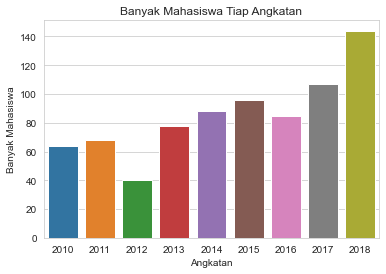

In [47]:
sns.countplot(data=df_combin,x='ANGKATAN',order=['2010','2011','2012','2013','2014','2015','2016','2017','2018'])
plt.title('Banyak Mahasiswa Tiap Angkatan')
plt.xlabel("Angkatan")
plt.ylabel('Banyak Mahasiswa')
plt.show()

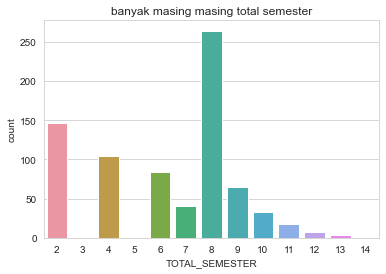

In [48]:
sns.countplot(data=df_combin,x='TOTAL_SEMESTER')
plt.title('banyak masing masing total semester')
plt.show()  

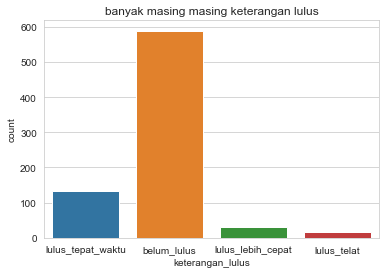

In [49]:
sns.countplot(data=df_combin,x='keterangan_lulus')
plt.title('banyak masing masing keterangan lulus')
plt.show()  

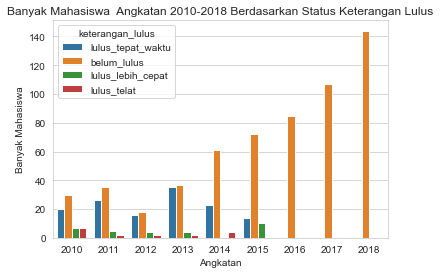

In [50]:
sns.countplot(data=df_combin,x='ANGKATAN',hue='keterangan_lulus',order=['2010','2011','2012','2013','2014','2015','2016','2017','2018'])
plt.title('Banyak Mahasiswa  Angkatan 2010-2018 Berdasarkan Status Keterangan Lulus')
plt.xlabel('Angkatan')
plt.ylabel('Banyak Mahasiswa')
plt.show()    #2016,2017,2018 belum ada yang lulus

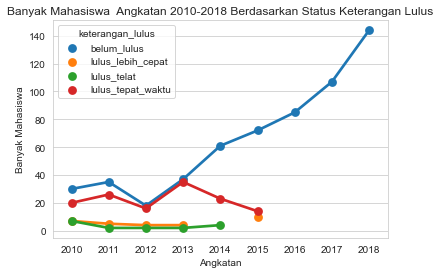

In [51]:
f=df_combin.groupby(['ANGKATAN','keterangan_lulus'])[['IPK']].count().reset_index()
sns.pointplot(data=f,y='IPK',x='ANGKATAN',hue='keterangan_lulus')
plt.xlabel('Angkatan')
plt.ylabel('Banyak Mahasiswa')
plt.title('Banyak Mahasiswa  Angkatan 2010-2018 Berdasarkan Status Keterangan Lulus')

plt.show()

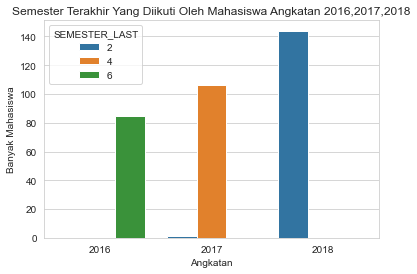

In [52]:
s=sns.countplot(data=df_combin[df_combin['ANGKATAN'].isin(['2016','2017','2018'])],x='ANGKATAN',hue='SEMESTER_LAST')

plt.title('Semester Terakhir Yang Diikuti Oleh Mahasiswa Angkatan 2016,2017,2018')  
plt.ylabel('Banyak Mahasiswa')
plt.xlabel('Angkatan')
sns.move_legend(s,'upper left')

plt.show()

In [53]:
df_combin[df_combin.ANGKATAN=='2017']['SEMESTER_LAST'].value_counts()

4    106
2      1
Name: SEMESTER_LAST, dtype: int64

Untuk angkatan 2016,2017,2018 normla jika belum lulus. Total semester yang normal untuk angkan 2016-2018 adalah
- angkatan 2018: 2 semester
- angkatan 2017: 4 semester
- angkatan 2016: 6 semester

Akan dicari faktor yang menyebabkan angkatan 2010 - 2015 belum lulus


### Faktor yang menyebabkan angkatan 2010- 2015 belum lulus

In [54]:
x=df_combin.copy(deep=True)
df_lulus=x[x['ANGKATAN'].isin(['2010','2011','2012','2013','2014','2015'])]

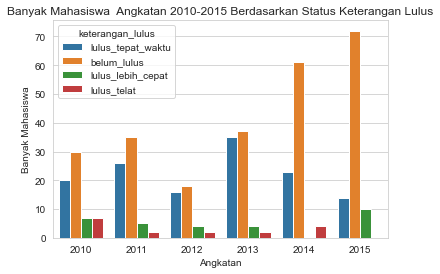

In [55]:
sns.countplot(data=df_lulus,x="ANGKATAN",hue='keterangan_lulus',order=['2010','2011','2012','2013','2014','2015'])
plt.title('Banyak Mahasiswa  Angkatan 2010-2015 Berdasarkan Status Keterangan Lulus')
plt.xlabel('Angkatan')
plt.ylabel('Banyak Mahasiswa')
plt.show()
#mayoritas angkatan belum lulus semua 

In [56]:
def g(x):
    if x!='belum_lulus':
        return 'lulus'
    else:
        return x
df_lulus['lulus/tidak']=df_lulus['keterangan_lulus'].apply(g)

<ipython-input-56-fa8c7a3eea31>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lulus['lulus/tidak']=df_lulus['keterangan_lulus'].apply(g)


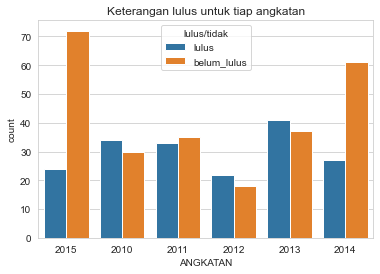

In [57]:
sns.countplot(data=df_lulus,x="ANGKATAN",hue='lulus/tidak')
plt.title('Keterangan lulus untuk tiap angkatan')
plt.show()
#emang mayoritas belum lulus aja setelah digabung sama aja kok. Selanjutnya akan dicari faktor kenapa belum lulusnya

Terdapat 3 faktor yang menentukan kelulusan yaitu
- IPK>2.5
- SKS > 144
- pernah dapat d,e,atau f

diantara ketiga faktor ini akan dicari faktor manakah yang paling kuat menyebabkan angkatan 2010-2015 belum lulus


In [58]:
df_not_lulus=df_lulus[df_lulus['keterangan_lulus']=='belum_lulus']
df_not_lulus.head()

,ANGKATAN,TOTAL_IPS,TOTAL_SEMESTER,SEMESTER_LAST,IPK,SKS/NIM,d/e/f,keterangan_lulus,lulus/tidak
NIM,,,,,,,,,
10082,2015,22.931968,7,7,3.275995,136,1,belum_lulus,belum_lulus
10110310002,2010,23.296627,8,8,2.912078,145,1,belum_lulus,belum_lulus
10110310004,2010,29.790209,10,10,2.979021,145,1,belum_lulus,belum_lulus
10110310006,2010,24.586081,8,8,3.073260,145,1,belum_lulus,belum_lulus
10110310007,2010,22.983135,8,8,2.872892,145,1,belum_lulus,belum_lulus


In [59]:
def ipk(x):
    if x<2.5:
        return 1
    else:
        return 0
def sks(x):
    if x<144:
        return 1
    else:
        return 0


In [60]:
df_not_lulus['ipk<2.5']=df_not_lulus['IPK'].apply(ipk)
df_not_lulus['sks<144']=df_not_lulus['SKS/NIM'].apply(sks)
df_not_lulus=df_not_lulus[['ANGKATAN','TOTAL_IPS','TOTAL_SEMESTER','SKS/NIM','IPK','d/e/f','ipk<2.5','sks<144']]
df_not_lulus.reset_index(inplace=True)
df_not_lulus.head()

<ipython-input-60-bcdf20bb5700>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_lulus['ipk<2.5']=df_not_lulus['IPK'].apply(ipk)
<ipython-input-60-bcdf20bb5700>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_lulus['sks<144']=df_not_lulus['SKS/NIM'].apply(sks)


,NIM,ANGKATAN,TOTAL_IPS,TOTAL_SEMESTER,SKS/NIM,IPK,d/e/f,ipk<2.5,sks<144
0,10082,2015,22.931968,7,136,3.275995,1,0,1
1,10110310002,2010,23.296627,8,145,2.912078,1,0,0
2,10110310004,2010,29.790209,10,145,2.979021,1,0,0
3,10110310006,2010,24.586081,8,145,3.073260,1,0,0
4,10110310007,2010,22.983135,8,145,2.872892,1,0,0


ada 7 kategori yang menyebabkan mahasiswa belum lulus
- kategori Q: dapat d/e/f , ipk<2.5, sks<144 
- kategori W: dapat d/e/f,ipk<2.5
- kategori E: dapat d/e/f, sks<144
- kategori R: ipk<2.5, sks<144
- kategori S: dapat d/e/f
- kategori T: ipk<2.5
- kategori Y: sks<144


In [61]:
def u(x):
    if x['d/e/f']==1 and x['ipk<2.5']==1  and x['sks<144']==1 :
        return 'Q'
    elif x['d/e/f']==1 and x['ipk<2.5']==1  and x['sks<144']==0 :
        return 'W'
    elif x['d/e/f']==1 and x['ipk<2.5']==0  and x['sks<144']==1 :
        return 'E'
    elif x['d/e/f']==0 and x['ipk<2.5']==1  and x['sks<144']==1 :
        return 'R'
    elif x['d/e/f']==1 and x['ipk<2.5']==0  and x['sks<144']==0 :
        return 'S'
    elif x['d/e/f']==0 and x['ipk<2.5']==1  and x['sks<144']==0 :
        return 'T'
    elif x['d/e/f']==0 and x['ipk<2.5']==0  and x['sks<144']==1 :
        return 'Y'

In [62]:
df_not_lulus['kategori_belum_lulus']=df_not_lulus.apply(u,axis=1)

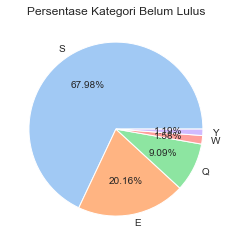

In [63]:
colors = sns.color_palette('pastel')[0:5]
df_not_lulus.rename(columns={'kategori_belum_lulus':''})[''].value_counts().plot(kind='pie',autopct='%.2f%%',colors=colors)
plt.title('Persentase Kategori Belum Lulus')

plt.show()

Jadi kategori  kategori yang menyebabkan murid belum lulus  untuk  angkatan 2010-2015 adalah
- kategori S: dapat d/e/f
- kategori E: dapat d/e/f, total sks<144
- kategori Q: dapat d/e/f , ipk<2.5, total sks<144
- kategori W: dapat d/e/f,ipk<2.5
- kategori Y: total sks<144

    

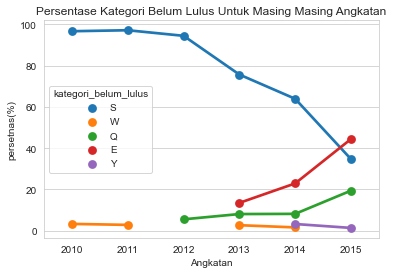

In [64]:
df_poin=df_not_lulus.groupby(['ANGKATAN','kategori_belum_lulus'])[['NIM']].count()
df_poin['pres(%)']=df_poin.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
sns.pointplot(data=df_poin.reset_index(),y='pres(%)',x='ANGKATAN',hue='kategori_belum_lulus')
plt.title('Persentase Kategori Belum Lulus Untuk Masing Masing Angkatan')
plt.xlabel('Angkatan')
plt.ylabel('persetnas(%)')
plt.show()


### Faktor yang menyebabkan mahasiswa belum lulus jika dibagi per angkatan

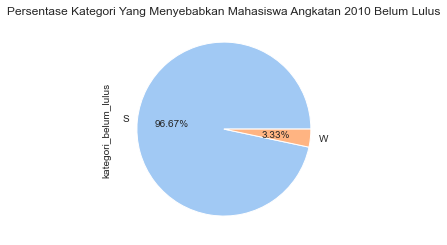

In [65]:
#angkatan 2010
colors = sns.color_palette('pastel')[0:5]
df_not_lulus[df_not_lulus['ANGKATAN']=='2010']['kategori_belum_lulus'].value_counts().plot(kind='pie',autopct='%.2f%%',colors=colors)
plt.title('Persentase Kategori Yang Menyebabkan Mahasiswa Angkatan 2010 Belum Lulus')

plt.show()

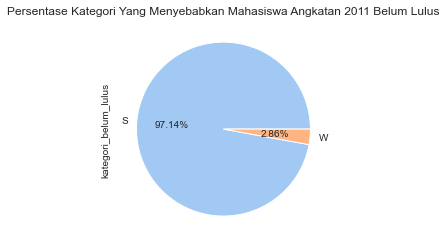

In [66]:
colors = sns.color_palette('pastel')[0:5]
df_not_lulus[df_not_lulus['ANGKATAN']=='2011']['kategori_belum_lulus'].value_counts().plot(kind='pie',autopct='%.2f%%',colors=colors)
plt.title('Persentase Kategori Yang Menyebabkan Mahasiswa Angkatan 2011 Belum Lulus')
plt.show()

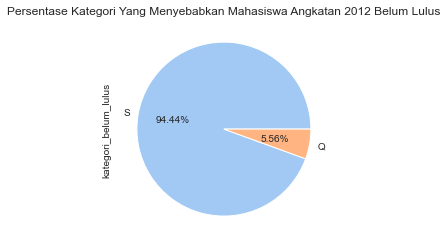

In [67]:
colors = sns.color_palette('pastel')[0:5]
df_not_lulus[df_not_lulus['ANGKATAN']=='2012']['kategori_belum_lulus'].value_counts().plot(kind='pie',autopct='%.2f%%',colors=colors)
plt.title('Persentase Kategori Yang Menyebabkan Mahasiswa Angkatan 2012 Belum Lulus')
plt.show()

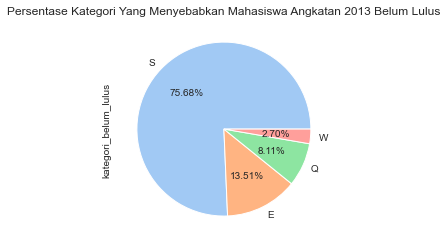

In [68]:
colors = sns.color_palette('pastel')[0:5]
df_not_lulus[df_not_lulus['ANGKATAN']=='2013']['kategori_belum_lulus'].value_counts().plot(kind='pie',autopct='%.2f%%',colors=colors)
plt.title('Persentase Kategori Yang Menyebabkan Mahasiswa Angkatan 2013 Belum Lulus')
plt.show()

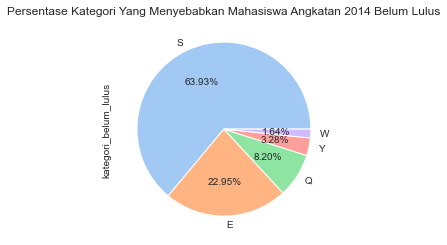

In [69]:
colors = sns.color_palette('pastel')[0:5]
df_not_lulus[df_not_lulus['ANGKATAN']=='2014']['kategori_belum_lulus'].value_counts().plot(kind='pie',autopct='%.2f%%',colors=colors)
plt.title('Persentase Kategori Yang Menyebabkan Mahasiswa Angkatan 2014 Belum Lulus')
plt.show()

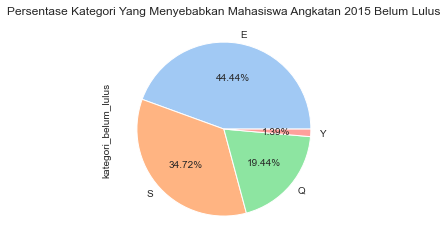

In [70]:
colors = sns.color_palette('pastel')[0:5]
df_not_lulus[df_not_lulus['ANGKATAN']=='2015']['kategori_belum_lulus'].value_counts().plot(kind='pie',autopct='%.2f%%',colors=colors)
plt.title('Persentase Kategori Yang Menyebabkan Mahasiswa Angkatan 2015 Belum Lulus')
plt.show()

dapat dipastikan bahwa alasan mendapat d,e f dan sks<144 menjadi faktor utama  banyak mahasiswa yang tidak lulus

### presentase grade tiap matkul 

###  presentase komposisi nilai jika seluruh angkatan di total

In [71]:
df_countmk=df['KODE_MK'].value_counts().rename_axis('KODE_MK').to_frame('counts').sort_values(by='counts',ascending=False).reset_index()
df_countmk=df_countmk[df_countmk['counts']>=50]
print(df_countmk.shape )
df_countmk.head()#ambil matkul yang pernah diambil lebih dari 50

(116, 2)


,KODE_MK,counts
0,EA100,741
1,IK402,625
2,EM604,603
3,IS220,600
4,IS240,542


In [72]:
df_mk=df.groupby(['KODE_MK','GRADE'])[['NIM']].count()
df_mk.rename(columns={'NIM':'count'},inplace=True)

In [73]:
df_mk['presentase']=df_mk.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
df_mk.head()

count  presentase
KODE_MK GRADE                   
CE441   A         16    3.532009
        A-        25    5.518764
        B         58   12.803532
        B+        48   10.596026
        B-        62   13.686534

In [74]:
df_nilai =df_mk.reset_index()


In [75]:
#cari presentase total d e,f
df_tot=df_nilai[df_nilai['GRADE'].isin(['D','E','F'])].groupby(['KODE_MK']).sum()  
df_tot.reset_index(inplace=True)
df_tot=df_tot[df_tot.KODE_MK.isin(df_countmk['KODE_MK'].unique())]
df_tot.sort_values(by='presentase',ascending=False,inplace=True)
df_tot.head(10) #untuk matkul IS225 akan dan IS355 akan diteliti lebih jauh

,KODE_MK,count,presentase
29,IS255,108,54.822335
34,IS355,44,33.333333
4,EA100,220,29.689609
20,IS110,99,24.937028
46,IS556,42,23.728814
25,IS230,79,22.379603
13,IF100,34,21.118012
16,IF141,62,18.562874
38,IS431,64,17.438692
0,CE441,76,16.777042


In [76]:
#cari presentase total A
df_A=df_nilai[df_nilai['GRADE'].isin(['A'])].groupby(['KODE_MK']).sum()  
df_A.rename(columns={'presentase':'presentase A'},inplace=True)
df_A.reset_index(inplace=True)
df_A=df_A[df_A.KODE_MK.isin(df_countmk['KODE_MK'].unique())]
df_A.sort_values(by='presentase A',ascending=False,inplace=True)
df_A.head(10)   #masih wajar 

,KODE_MK,count,presentase A
99,SI661,114,94.214876
121,TI751,124,93.233083
71,IS747,51,91.071429
94,SI612,115,88.461538
60,IS645,53,84.126984
58,IS624,216,82.758621
62,IS652,312,81.250000
107,SI860,75,78.947368
100,SI664,101,78.294574
52,IS555,50,75.757576


In [77]:
#cari presentase total B
df_B=df_nilai[df_nilai['GRADE'].isin(['B','B+','B-'])].groupby(['KODE_MK']).sum()  
df_B.rename(columns={'presentase':'presentase B'},inplace=True)
df_B.reset_index(inplace=True)
df_B=df_B[df_B.KODE_MK.isin(df_countmk['KODE_MK'].unique())]
df_B.sort_values(by='count',ascending=False,inplace=True)
df_B.head()   #masih wajar  

,KODE_MK,count,presentase B
12,EM604,324,53.731343
131,UM223,293,54.766355
122,UM122,271,51.520913
6,EA410,271,58.405172
126,UM152,258,49.049430


In [78]:
#cari presentase total C
df_C=df_nilai[df_nilai['GRADE'].isin(['C','C+'])].groupby(['KODE_MK']).sum()  
df_C.rename(columns={'presentase':'presentase C'},inplace=True)
df_C.reset_index(inplace=True)
df_C=df_C[df_C.KODE_MK.isin(df_countmk['KODE_MK'].unique())]
df_C.sort_values(by='count',ascending=False,inplace=True)
df_C.head() #masih wajar

,KODE_MK,count,presentase C
4,EA100,190,25.641026
11,EM372,169,36.501080
0,CE441,168,37.086093
41,IS431,140,38.147139
119,UM223,139,25.981308


presentase nilai d,e,f dan a akan diteliti lebih lanjut

###  presentase komposisi nilai d,e,f jika  hanya dilliat angkatan 2010-2015

In [79]:
df_201015=df[df['ANGKATAN'].isin(['2010','2011','2012','2013','2014','2015'])]
df_countmk=df_201015['KODE_MK'].value_counts().rename_axis('KODE_MK').to_frame('counts').sort_values(by='counts',ascending=False).reset_index()
df_countmk=df_countmk[df_countmk['counts']>=50]
print(df_countmk.shape )
df_countmk.head()#ambil matkul yang pernah diambil lebih dari 50

(106, 2)


,KODE_MK,counts
0,IK402,434
1,EA100,432
2,EM604,430
3,EA410,423
4,EM372,393


In [80]:
df_mk=df[df['ANGKATAN'].isin(['2010','2011','2012','2013','2014','2015'])].groupby(['KODE_MK','GRADE'])[['NIM']].count()
df_mk.rename(columns={'NIM':'count'},inplace=True)
df_mk['presentase']=df_mk.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

df_mk.reset_index(inplace=True)
df_tot=df_mk[df_mk['GRADE'].isin(['D','E','F'])].groupby(['KODE_MK']).sum()

df_tot.rename(columns={'presentase':'presentase d,e,f 2010-2015'},inplace=True)
df_tot.reset_index(inplace=True)
df_tot=df_tot[df_tot.KODE_MK.isin(df_countmk['KODE_MK'].unique())]
df_tot.sort_values(by='presentase d,e,f 2010-2015',ascending=False,inplace=True)
df_tot.head(10)   #IS255 , IS355,is556 matkul yang bermasalah menyangkal banyak menyebabkan mahasiswa tidak lulus

,KODE_MK,count,"presentase d,e,f 2010-2015"
20,IS110,33,16.019417
5,EA201,39,15.600000
28,IS302,30,14.218009
34,IS431,29,14.146341
4,EA100,61,14.120370
0,CE441,34,12.454212
41,IS545,6,9.836066
39,IS534,24,9.160305
17,IF635,22,9.090909
62,SI325,19,9.090909


### presentase komposisi nilai d,e,f pada angkatan 2010

In [81]:
df_mk=df[df['ANGKATAN'].isin(['2010'])].groupby(['KODE_MK','GRADE'])[['NIM']].count()
df_mk.rename(columns={'NIM':'count'},inplace=True)
df_mk['presentase']=df_mk.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

df_mk.reset_index(inplace=True)
df_tot=df_mk[df_mk['GRADE'].isin(['D','E','F'])].groupby(['KODE_MK']).sum()

df_tot.rename(columns={'presentase':'presentase d,e,f 2010'},inplace=True)
df_tot.sort_values(by='count',ascending=False,inplace=True)
df_tot.head()   #IS255 , IS355,is556 matkul yang bermasalah menyangkal banyak menyebabkan mahasiswa tidak lulus

,count,"presentase d,e,f 2010"
KODE_MK,,
TI100,7,11.475410
EA100,5,7.812500
EM100,4,6.349206
TI532,3,4.918033
SI521,3,4.687500


### presentase komposisi nilai d,e,f pada angkatan 2011

In [82]:
df_mk=df[df['ANGKATAN'].isin(['2011'])].groupby(['KODE_MK','GRADE'])[['NIM']].count()
df_mk.rename(columns={'NIM':'count'},inplace=True)
df_mk['presentase']=df_mk.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

df_mk.reset_index(inplace=True)
df_tot=df_mk[df_mk['GRADE'].isin(['D','E','F'])].groupby(['KODE_MK']).sum()

df_tot.rename(columns={'presentase':'presentase d,e,f 2011'},inplace=True)
df_tot.sort_values(by='count',ascending=False,inplace=True)
df_tot.head()   #IS255 , IS355,is556 matkul yang bermasalah menyangkal banyak menyebabkan mahasiswa tidak lulus

,count,"presentase d,e,f 2011"
KODE_MK,,
SI325,17,26.984127
TI532,6,9.677419
SK430,4,6.557377
EA100,4,5.882353
IS534,2,33.333333


### presentase komposisi nilai d,e,f pada angkatan 2012

In [83]:
df_mk=df[df['ANGKATAN'].isin(['2012'])].groupby(['KODE_MK','GRADE'])[['NIM']].count()
df_mk.rename(columns={'NIM':'count'},inplace=True)
df_mk['presentase']=df_mk.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

df_mk.reset_index(inplace=True)
df_tot=df_mk[df_mk['GRADE'].isin(['D','E','F'])].groupby(['KODE_MK']).sum()

df_tot.rename(columns={'presentase':'presentase d,e,f 2012'},inplace=True)
df_tot.sort_values(by='count',ascending=False,inplace=True)
df_tot.head()   #IS255 , IS355,is556 matkul yang bermasalah menyangkal banyak menyebabkan mahasiswa tidak lulus

,count,"presentase d,e,f 2012"
KODE_MK,,
SI210,5,15.625000
SK430,5,15.151515
EM372,3,7.500000
SI431,3,8.571429
IS782,2,7.142857


### presentase komposisi nilai d,e,f pada angkatan 2013

In [84]:
df_mk=df[df['ANGKATAN'].isin(['2013'])].groupby(['KODE_MK','GRADE'])[['NIM']].count()
df_mk.rename(columns={'NIM':'count'},inplace=True)
df_mk['presentase']=df_mk.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

df_mk.reset_index(inplace=True)
df_tot=df_mk[df_mk['GRADE'].isin(['D','E','F'])].groupby(['KODE_MK']).sum()

df_tot.rename(columns={'presentase':'presentase d,e,f 2013'},inplace=True)
df_tot.sort_values(by='count',ascending=False,inplace=True)
df_tot.head()   #IS255 , IS355,is556 matkul yang bermasalah menyangkal banyak menyebabkan mahasiswa tidak lulus

,count,"presentase d,e,f 2013"
KODE_MK,,
CE441,12,15.384615
EA100,10,12.987013
IF635,6,8.108108
TI100,5,7.042254
IS534,5,6.666667


### presentase komposisi nilai d,e,f pada angkatan 2014

In [85]:
df_mk=df[df['ANGKATAN'].isin(['2014'])].groupby(['KODE_MK','GRADE'])[['NIM']].count()
df_mk.rename(columns={'NIM':'count'},inplace=True)
df_mk['presentase']=df_mk.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

df_mk.reset_index(inplace=True)
df_tot=df_mk[df_mk['GRADE'].isin(['D','E','F'])].groupby(['KODE_MK']).sum()

df_tot.rename(columns={'presentase':'presentase d,e,f 2014'},inplace=True)
df_tot.sort_values(by='count',ascending=False,inplace=True)
df_tot.head()   #IS255 , IS355,is556 matkul yang bermasalah menyangkal banyak menyebabkan mahasiswa tidak lulus

,count,"presentase d,e,f 2014"
KODE_MK,,
EA100,21,23.863636
IS110,14,15.909091
EA201,13,25.000000
EM372,12,17.647059
CE441,7,7.954545


### presentase komposisi nilai d,e,f pada angkatan 2015

In [86]:
df_mk=df[df['ANGKATAN'].isin(['2015'])].groupby(['KODE_MK','GRADE'])[['NIM']].count()
df_mk.rename(columns={'NIM':'count'},inplace=True)
df_mk['presentase']=df_mk.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

df_mk.reset_index(inplace=True)
df_tot=df_mk[df_mk['GRADE'].isin(['D','E','F'])].groupby(['KODE_MK']).sum()

df_tot.rename(columns={'presentase':'presentase d,e,f 2015'},inplace=True)
df_tot.sort_values(by='count',ascending=False,inplace=True)
df_tot.head()   #IS255 , IS355,is556 matkul yang bermasalah menyangkal banyak menyebabkan mahasiswa tidak lulus

,count,"presentase d,e,f 2015"
KODE_MK,,
EA201,22,28.205128
IS302,22,24.719101
EA100,21,22.105263
IS431,20,21.978022
IS110,19,19.791667


- terdapat matkul yang hanya pernah diambil oleh 1-5 orang ini sangat aneh
- alasan matkul tersebut kenapa bisa presentase d,e,f bisa sangat tinggi dapat dilihat pada file dosen

In [87]:
df[(df['KODE_MK']=='IS355') & (df['ANGKATAN'].isin(['2015']))]

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE,BOBOT_NILAI,BOBOTxSKS
18568,9486,2015,1811,IS355,Konsep Sistem Operasi,3,47.0,D,1.0,3.0
19066,10153,2015,1821,IS355,Konsep Sistem Operasi,3,71.0,B,3.0,9.0
19151,10202,2015,1811,IS355,Konsep Sistem Operasi,3,25.0,E,0.0,0.0
19347,10382,2015,1811,IS355,Konsep Sistem Operasi,3,25.0,E,0.0,0.0
19862,10752,2015,1811,IS355,Konsep Sistem Operasi,3,32.0,E,0.0,0.0
22172,12510,2015,1821,IS355,Konsep Sistem Operasi,3,81.0,A-,3.7,11.1


In [88]:
 # pada 2013 dan 2015 ada data semester 1911
df['SEMESTER'].value_counts()

1811    2813
1821    2696
1721    2364
1711    2279
1611    2166
1621    2153
1521    2032
1511    2000
1411    1865
1421    1761
1311    1479
1321    1458
1221    1192
1211    1147
1121     967
1111     834
1021     472
1011     403
1911       5
Name: SEMESTER, dtype: int64

In [89]:
#harus ditinjau komposisi grade untuk tiap semester
#sekarang harus diliat aspek matkul yang paling banyak diambil
#coba biki komposisi d,e,f pada matkul tiap semester 

### Korelasi  IP 2,4,6 tahun pertama dengan IPK

In [90]:
def f(x):
    if x['ANGKATAN']=='2010':
        if x['SEMESTER']=='1011':
            return 1
        elif x['SEMESTER']=='1021':
            return 2
        elif x['SEMESTER']=='1111':
            return 3
        elif x['SEMESTER']=='1121':
            return 4
        elif x['SEMESTER']=='1211':
            return 5
        elif x['SEMESTER']=='1221':
            return 6
        elif x['SEMESTER']=='1311':
            return 7
        elif x['SEMESTER']=='1321':
            return 8
        elif x['SEMESTER']=='1411':
            return 9
        elif x['SEMESTER']=='1421':
            return 10
        elif x['SEMESTER']=='1511':
            return 11
        elif x['SEMESTER']=='1521':
            return 12
        elif x['SEMESTER']=='1621':
            return 14
    elif x['ANGKATAN']=='2011':
 
        if x['SEMESTER']=='1111':
            return 1
        elif x['SEMESTER']=='1121':
            return 2
        elif x['SEMESTER']=='1211':
            return 3
        elif x['SEMESTER']=='1221':
            return 4
        elif x['SEMESTER']=='1311':
            return 5
        elif x['SEMESTER']=='1321':
            return 6
        elif x['SEMESTER']=='1411':
            return 7
        elif x['SEMESTER']=='1421':
            return 8
        elif x['SEMESTER']=='1511':
            return 9
        elif x['SEMESTER']=='1521':
            return 10
        elif x['SEMESTER']=='1611':
            return 11
        elif x['SEMESTER']=='1621':
            return 12
        elif x['SEMESTER']=='1711':
            return 13
        elif x['SEMESTER']=='1721':
            return 14
    elif x['ANGKATAN']=='2012':
       
        if x['SEMESTER']=='1211':
            return 1
        elif x['SEMESTER']=='1221':
            return 2
        elif x['SEMESTER']=='1311':
            return 3
        elif x['SEMESTER']=='1321':
            return 4
        elif x['SEMESTER']=='1411':
            return 5
        elif x['SEMESTER']=='1421':
            return 6
        elif x['SEMESTER']=='1511':
            return 7
        elif x['SEMESTER']=='1521':
            return 8
        elif x['SEMESTER']=='1611':
            return 9
        elif x['SEMESTER']=='1621':
            return 10
        elif x['SEMESTER']=='1711':
            return 11
        elif x['SEMESTER']=='1721':
            return 12
        elif x['SEMESTER']=='1811':
            return 13
        elif x['SEMESTER']=='1821':
            return 14
    elif x['ANGKATAN']=='2013':
       
      
        if x['SEMESTER']=='1311':
            return 1
        elif x['SEMESTER']=='1321':
            return 2
        elif x['SEMESTER']=='1411':
            return 3
        elif x['SEMESTER']=='1421':
            return 4
        elif x['SEMESTER']=='1511':
            return 5
        elif x['SEMESTER']=='1521':
            return 6
        elif x['SEMESTER']=='1611':
            return 7
        elif x['SEMESTER']=='1621':
            return 8
        elif x['SEMESTER']=='1711':
            return 9
        elif x['SEMESTER']=='1721':
            return 10
        elif x['SEMESTER']=='1811':
            return 11
        elif x['SEMESTER']=='1821':
            return 12
        elif x['SEMESTER']=='1911':
            return 13
    elif x['ANGKATAN']=='2014':
        if x['SEMESTER']=='1411':
            return 1
        elif x['SEMESTER']=='1421':
            return 2
        elif x['SEMESTER']=='1511':
            return 3
        elif x['SEMESTER']=='1521':
            return 4
        elif x['SEMESTER']=='1611':
            return 5
        elif x['SEMESTER']=='1621':
            return 6
        elif x['SEMESTER']=='1711':
            return 7
        elif x['SEMESTER']=='1721':
            return 8
        elif x['SEMESTER']=='1811':
            return 9
        elif x['SEMESTER']=='1821':
            return 10
        elif x['SEMESTER']=='1911':
            return 11
    elif x['ANGKATAN']=='2015':
        
        if x['SEMESTER']=='1511':
            return 1
        elif x['SEMESTER']=='1521':
            return 2
        elif x['SEMESTER']=='1611':
            return 3
        elif x['SEMESTER']=='1621':
            return 4
        elif x['SEMESTER']=='1711':
            return 5
        elif x['SEMESTER']=='1721':
            return 6
        elif x['SEMESTER']=='1811':
            return 7
        elif x['SEMESTER']=='1821':
            return 8
        elif x['SEMESTER']=='1911':
            return 9
    elif x['ANGKATAN']=='2016':
        
        
        if x['SEMESTER']=='1611':
            return 1
        elif x['SEMESTER']=='1621':
            return 2
        elif x['SEMESTER']=='1711':
            return 3
        elif x['SEMESTER']=='1721':
            return 4
        elif x['SEMESTER']=='1811':
            return 5
        elif x['SEMESTER']=='1821':
            return 6
    elif x['ANGKATAN']=='2017':
        
    
        if x['SEMESTER']=='1711':
            return 1
        elif x['SEMESTER']=='1721':
            return 2
        elif x['SEMESTER']=='1811':
            return 3
        elif x['SEMESTER']=='1821':
            return 4
    elif x['ANGKATAN']=='2018':

        if x['SEMESTER']=='1811':
            return 1
        elif x['SEMESTER']=='1821':
            return 2



In [91]:
df_combin

,ANGKATAN,TOTAL_IPS,TOTAL_SEMESTER,SEMESTER_LAST,IPK,SKS/NIM,d/e/f,keterangan_lulus
NIM,,,,,,,,
10064,2015,29.977965,8,8,3.747246,145,0,lulus_tepat_waktu
10082,2015,22.931968,7,7,3.275995,136,1,belum_lulus
10110310002,2010,23.296627,8,8,2.912078,145,1,belum_lulus
10110310004,2010,29.790209,10,10,2.979021,145,1,belum_lulus
10110310005,2010,29.824176,8,8,3.728022,145,0,lulus_tepat_waktu
...,...,...,...,...,...,...,...,...
9780,2015,16.514478,8,8,2.064310,107,1,belum_lulus
9890,2015,18.607594,8,8,2.325949,125,1,belum_lulus
9915,2015,23.816818,8,8,2.977102,127,1,belum_lulus


In [92]:
df_ips=df_grup.reset_index()
df_ips=df_ips[df_ips.ANGKATAN.isin(['2010','2011','2012','2013','2014','2015'])]
df_ips['semester']=df_ips.apply(f,axis=1)
df_ips=pd.pivot_table(data=df_ips,index='NIM',columns='semester',values='IPS')
df_ips.fillna(0,inplace=True)
#df_ips.drop(columns=[9,10,11,12,13,14],axis=1).corr()
df_ips.head()
df_ips['IPK1_2']=(df_ips[1]+df_ips[2])/2
df_ips['IPK1_4']=(df_ips[1]+df_ips[2]+df_ips[3]+df_ips[4])/4
df_ips['IPK1_6']=(df_ips[1]+df_ips[2]+df_ips[3]+df_ips[4]+df_ips[5]+df_ips[6])/6
df_ips=df_ips[['IPK1_2','IPK1_4','IPK1_6']].merge(df_combin[['IPK']],on='NIM')
df_ips.corr()[['IPK']]


,IPK
IPK1_2,0.666822
IPK1_4,0.831250
IPK1_6,0.904990
IPK,1.000000


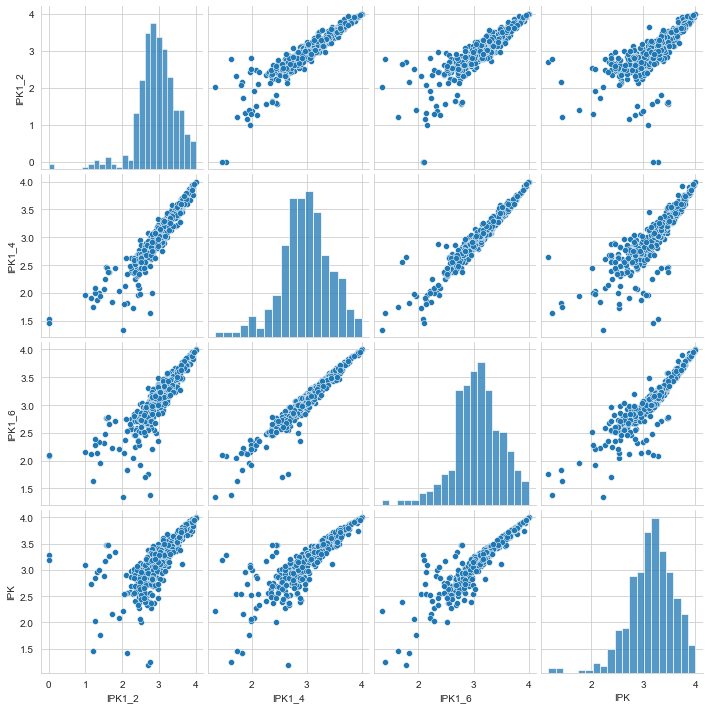

In [93]:
sns.pairplot(df_ips)

###  Mata kuliah 

In [94]:
df.groupby(['KODE_MK','SKS'])[['NIM']].count().reset_index()['SKS'].value_counts()

3    111
2     20
4     10
6      1
Name: SKS, dtype: int64

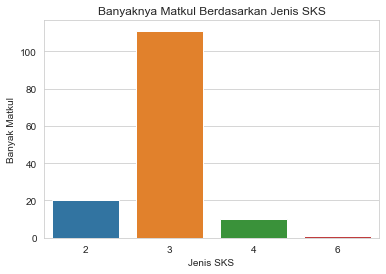

In [95]:
sns.countplot(data=df.groupby(['KODE_MK','SKS'])[['NIM']].count().reset_index(),x='SKS')
plt.ylabel('Banyak Matkul')
plt.xlabel('Jenis SKS')
plt.title('Banyaknya Matkul Berdasarkan Jenis SKS')
plt.show()

In [96]:
#apa matkulyang paling banyak diambil oleh angkatan 2010-2015
df_year=df[df['ANGKATAN'].isin(['2010','2011','2012','2013','2014','2015'])]
df_MK=df_year['KODE_MK'].value_counts().rename_axis('KODE_MK').to_frame('counts').sort_values(by='counts',ascending=False)
df_MK.head()

,counts
KODE_MK,
IK402,434
EA100,432
EM604,430
EA410,423
EM372,393


In [97]:
#apa nim yang tidak lulus pada angkatan 2010-2015
df_l=df_combin.reset_index()
df_l=df_l[(df_l['keterangan_lulus']=='belum_lulus') & (df_l.ANGKATAN.isin(['2010','2011','2012','2013','2014','2015']))]
NIM_tidak_lulus=df_l['NIM'].unique()

In [98]:
#apa matkul yang palibg banyak diambil oleh angkatan 2010- 2015 yang belum lulus

df_matkul=df_year[df_year['NIM'].isin(NIM_tidak_lulus)]
df_matkul=df_matkul['KODE_MK'].value_counts().rename_axis('KODE_MK').to_frame('counts').sort_values(by='counts',ascending=False)
df_matkul.head(30)

,counts
KODE_MK,
IK402,253
EA100,251
EM604,249
EA410,242
EM372,212
IS670,193
IS623,190
IS652,189
IS660,183


In [99]:
# kebanyakan yang belum lulus dapat d,e,f  dimana?
df_gagal=df[df.NIM.isin(NIM_tidak_lulus)]
df_gagal=df_gagal.groupby(['KODE_MK','GRADE'])[['NIM']].count()
df_gagal['presentase']=df_gagal.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
df_gagal.reset_index(inplace=True)
df_gagal=df_gagal[df_gagal['GRADE'].isin(['D','E','F'])].groupby(['KODE_MK']).sum()
df_gagal.reset_index(inplace=True)
df_gagal.rename(columns={'presentase':'presentase d,e,f 2010-2015','NIM':'count'},inplace=True)
df_gagal=df_gagal[df_gagal.KODE_MK.isin(df_countmk['KODE_MK'].unique())]
df_gagal.sort_values(by='presentase d,e,f 2010-2015',ascending=False,inplace=True)
df_gagal.head(-1)
#matkul dengan kadar >=8.7 % adalah matkul yang banyak menyebabkan ketidaklulusan pada mahasiswa angkatan 2010-2015 yang belum lulus

,KODE_MK,count,"presentase d,e,f 2010-2015"
5,EA201,39,28.467153
4,EA100,61,24.302789
62,SI325,19,22.891566
20,IS110,33,22.000000
28,IS302,30,19.108280
...,...,...,...
38,IS513,1,0.625000
52,IS726,1,0.595238
22,IS220,1,0.584795
29,IS321,1,0.568182


In [100]:
g=df.groupby(['KODE_MK'])[['NIM']].count()[['NIM']].rename(columns={'NIM':'Banyaknya Diambil'})
g[g['Banyaknya Diambil']<=10]

,Banyaknya Diambil
KODE_MK,
IF501,1
IF502,4
IF551,8
IF561,2
IF601,1
IF602,4
IF652,8
IF662,2
IF701,2


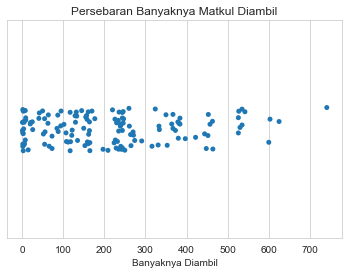

In [101]:
sns.stripplot(x=df.groupby(['KODE_MK'])[['NIM']].count()['NIM'])
plt.title('Persebaran Banyaknya Matkul Diambil')
plt.xlabel('Banyaknya Diambil')
plt.show()

In [102]:
df.groupby(['KODE_MK'])[['ANGKATAN']].count().rename(columns={'ANGKATAN':'Banyak diambil'}).sort_values(by='Banyak diambil',ascending=False).head(5)

,Banyak diambil
KODE_MK,
EA100,741
IK402,625
EM604,603
IS220,600
IS240,542


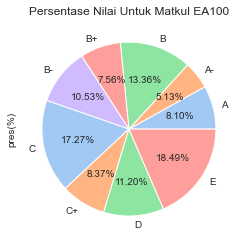

In [103]:
a=df[df.KODE_MK=='EA100']
a=a.groupby(['KODE_MK','GRADE'])[['NIM']].count().rename(columns={'NIM':'Banyak_index'})
a['pres(%)']=a.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
a=a.reset_index().drop('KODE_MK',axis=1)
a.set_index('GRADE',inplace=True)
a['pres(%)'].plot(kind='pie',autopct='%.2f%%',colors=colors)
plt.title('Persentase Nilai Untuk Matkul EA100')
plt.show()

In [104]:
a=df[df.KODE_MK=='EA100']
a.shape

(741, 10)

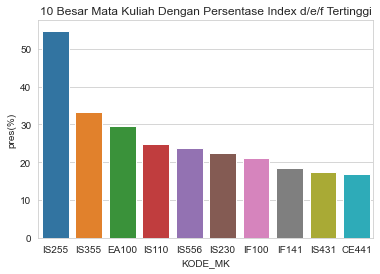

In [105]:
a=df.groupby(['KODE_MK'])[['ANGKATAN']].count().rename(columns={'ANGKATAN':'Banyak_Diambil'})
a.reset_index(inplace=True)
a=a[a.Banyak_Diambil>100]
b=df[df.KODE_MK.isin(a.KODE_MK.unique())]
b=b.groupby(['KODE_MK','GRADE'])[['NIM']].count()
b.rename(columns={'NIM':'Banyak_Index_D/E/F'},inplace=True)
b['pres(%)']=b.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
b.reset_index(inplace=True)
b=b[b.GRADE.isin(['D','E','F'])]
b=b.groupby('KODE_MK').sum().sort_values(by='pres(%)',ascending=False)
sns.barplot(data=b.head(10).reset_index(),x='KODE_MK',y='pres(%)')
plt.title('10 Besar Mata Kuliah Dengan Persentase Index d/e/f Tertinggi')
plt.show()

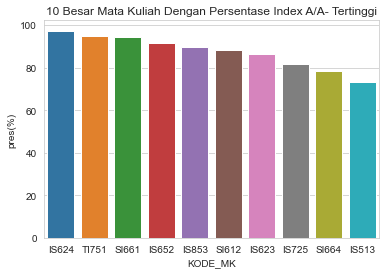

In [106]:
a=df.groupby(['KODE_MK'])[['ANGKATAN']].count().rename(columns={'ANGKATAN':'Banyak_Diambil'})
a.reset_index(inplace=True)
a=a[a.Banyak_Diambil>100]
b=df[df.KODE_MK.isin(a.KODE_MK.unique())]
b=b.groupby(['KODE_MK','GRADE'])[['NIM']].count()
b.rename(columns={'NIM':'Banyak_Index_A/A-'},inplace=True)
b['pres(%)']=b.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
b.reset_index(inplace=True)
b=b[b.GRADE.isin(['A','A-'])]
b=b.groupby('KODE_MK').sum().sort_values(by='pres(%)',ascending=False)
sns.barplot(data=b.head(10).reset_index(),x='KODE_MK',y='pres(%)')
plt.title('10 Besar Mata Kuliah Dengan Persentase Index A/A- Tertinggi')
plt.show()

### Persebaran IPK


In [107]:
df_combin

,ANGKATAN,TOTAL_IPS,TOTAL_SEMESTER,SEMESTER_LAST,IPK,SKS/NIM,d/e/f,keterangan_lulus
NIM,,,,,,,,
10064,2015,29.977965,8,8,3.747246,145,0,lulus_tepat_waktu
10082,2015,22.931968,7,7,3.275995,136,1,belum_lulus
10110310002,2010,23.296627,8,8,2.912078,145,1,belum_lulus
10110310004,2010,29.790209,10,10,2.979021,145,1,belum_lulus
10110310005,2010,29.824176,8,8,3.728022,145,0,lulus_tepat_waktu
...,...,...,...,...,...,...,...,...
9780,2015,16.514478,8,8,2.064310,107,1,belum_lulus
9890,2015,18.607594,8,8,2.325949,125,1,belum_lulus
9915,2015,23.816818,8,8,2.977102,127,1,belum_lulus


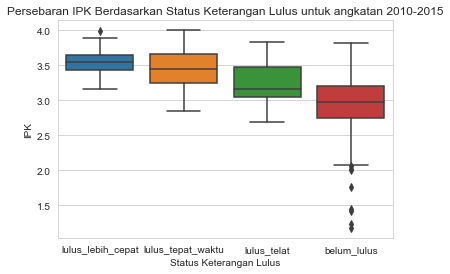

In [108]:
sns.boxplot(data=df_combin[df_combin.ANGKATAN.isin(['2010','2011','2012','2013','2014','2015'])],y='IPK',x='keterangan_lulus',order=['lulus_lebih_cepat','lulus_tepat_waktu','lulus_telat','belum_lulus'])
plt.title('Persebaran IPK Berdasarkan Status Keterangan Lulus untuk angkatan 2010-2015')
plt.xlabel('Status Keterangan Lulus')
plt.show() 

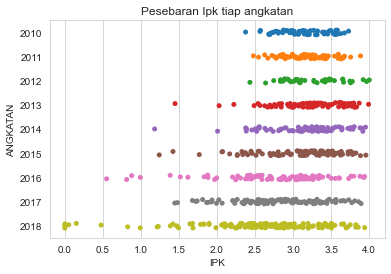

In [109]:
sns.stripplot(data=df_combin,x='IPK',y='ANGKATAN',order=['2010','2011','2012','2013','2014','2015','2016','2017','2018'])
plt.title('Pesebaran Ipk tiap angkatan')
plt.show() 

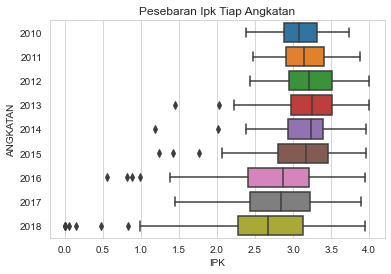

In [110]:
sns.boxplot(data=df_combin,x='IPK',y='ANGKATAN',order=['2010','2011','2012','2013','2014','2015','2016','2017','2018'])
plt.title('Pesebaran Ipk Tiap Angkatan')
plt.show()  #grafik yang wajar karena makin tinggi angkatan maka pasti banyak yang belum lulus

In [111]:
df_combin[df_combin.TOTAL_SEMESTER!=df_combin.SEMESTER_LAST].shape

(55, 8)

# Dataset2_EvaluasiDosenPerMk

Akan dilakukan pembersihan data pada file 'Dataset2_EvaluasiDosenPerMk'

In [112]:
df_d=pd.read_excel('Dataset2_EvaluasiDosenPerMK.xlsx')
df_d.head()

,TAHUN,SEMESTER,MATAKULIAH,PERTANYAAN,KETERANGAN,NILAI
0,2015,1511,IS100 Management Information Systems,1,Kesiapan memberikan perkuliahan/praktikum,3.28
1,2015,1511,IS100 Management Information Systems,2,Upaya menyampaikan materi perkuliahan/praktik...,3.25
2,2015,1511,IS100 Management Information Systems,3,Sistematis dalam menyampaikan materi perkuliah...,3.24
3,2015,1511,IS100 Management Information Systems,4,Kemampuan memberikan contoh yang relevan dari ...,3.30
4,2015,1511,IS100 Management Information Systems,5,Penyampaian materi perkuliahan sesuai dengan k...,3.27


# Data understanding

In [113]:
null(df_d)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2114 entries, 0 to 2113
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TAHUN       2114 non-null   int64  
 1   SEMESTER    2114 non-null   int64  
 2   MATAKULIAH  2114 non-null   object 
 3   PERTANYAAN  2114 non-null   int64  
 4   KETERANGAN  2114 non-null   object 
 5   NILAI       2114 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 99.2+ KB


(TAHUN         0
 SEMESTER      0
 MATAKULIAH    0
 PERTANYAAN    0
 KETERANGAN    0
 NILAI         0
 dtype: int64,
 None)

In [114]:
df_d[df_d.duplicated(subset=['TAHUN','SEMESTER','MATAKULIAH','KETERANGAN'],keep=False) ] #tidak ada data duplikat

,TAHUN,SEMESTER,MATAKULIAH,PERTANYAAN,KETERANGAN,NILAI


In [115]:
df_d.describe()[['NILAI']]

,NILAI
count,2114.000000
mean,3.308955
std,0.269830
min,2.000000
25%,3.170000
50%,3.320000
75%,3.450000
max,4.000000


In [116]:
print('Kategori pada variabel SEMESTER adalah', df_d['SEMESTER'].unique())
print('Kategori pada variabel TAHUN adalah',df_d['TAHUN'].unique())
print('Kategori pada variabel PERTANYAAN ',df_d['PERTANYAAN'].unique())
print('Kategori pada variabel KETERANGAN ',df_d['KETERANGAN'].unique())

Kategori pada variabel SEMESTER adalah [1511 1521 1611 1621 1711 1721 1811 1821]
Kategori pada variabel TAHUN adalah [2015 2016 2017 2018]
Kategori pada variabel PERTANYAAN  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Kategori pada variabel KETERANGAN  ['Kesiapan memberikan perkuliahan/praktikum'
 'Upaya  menyampaikan materi perkuliahan/praktikum dengan jelas'
 'Sistematis dalam menyampaikan materi perkuliahan/praktikum'
 'Kemampuan memberikan contoh yang relevan dari materi yang diajarkan'
 'Penyampaian materi perkuliahan sesuai dengan kontrak perkuliahan'
 'Pemakaian buku teks sebagai buku utama perkuliahan'
 'Memberi review materi  perkuliahan sebelumnya'
 'Pemberian kesempatan bertanya, berdiskusi serta berkonsultasi (baik di dalam maupun di luar kelas)'
 'Kejelasan menjawab pertanyaan /diskusi di kelas'
 'Pemberian tugas/kuis serta pembahasannya di kelas'
 'Kemampuan memotivasi semangat belajar mahasiswa'
 'Kemampuan menerima kritik, saran dan pendapat'
 'Fairness dalam memberikan

In [117]:
print('Kategori pada variabel PERTANYAAN ',df_d['PERTANYAAN'].nunique())
print('Kategori pada variabel KETERANGAN ',df_d['KETERANGAN'].nunique())

Kategori pada variabel PERTANYAAN  14
Kategori pada variabel KETERANGAN  14


In [118]:
df_d.groupby(['PERTANYAAN','KETERANGAN']).count()

,,TAHUN,SEMESTER,MATAKULIAH,NILAI
PERTANYAAN,KETERANGAN,,,,
1,Kesiapan memberikan perkuliahan/praktikum,151,151,151,151
2,Upaya menyampaikan materi perkuliahan/praktikum dengan jelas,151,151,151,151
3,Sistematis dalam menyampaikan materi perkuliahan/praktikum,151,151,151,151
4,Kemampuan memberikan contoh yang relevan dari materi yang diajarkan,151,151,151,151
5,Penyampaian materi perkuliahan sesuai dengan kontrak perkuliahan,151,151,151,151
6,Pemakaian buku teks sebagai buku utama perkuliahan,151,151,151,151
7,Memberi review materi perkuliahan sebelumnya,151,151,151,151
8,"Pemberian kesempatan bertanya, berdiskusi serta berkonsultasi (baik di dalam maupun di luar kelas)",151,151,151,151
9,Kejelasan menjawab pertanyaan /diskusi di kelas,151,151,151,151


In [119]:
df_d.groupby(['TAHUN','SEMESTER']).count()

MATAKULIAH  PERTANYAAN  KETERANGAN  NILAI
TAHUN SEMESTER                                           
2015  1511             294         294         294    294
      1521             252         252         252    252
2016  1611             308         308         308    308
      1621             280         280         280    280
2017  1711              70          70          70     70
      1721             294         294         294    294
2018  1811             322         322         322    322
      1821             294         294         294    294

# Data preparation

## Cleaning Data


### ubah tipe data

In [120]:
df_d['TAHUN']=df_d['TAHUN'].astype('str')
df_d['SEMESTER']=df_d['SEMESTER'].astype('str')
df_d['PERTANYAAN']=df_d['PERTANYAAN'].astype('int')

### feature enginering 

In [121]:
df_d['KODE_MK'] =df_d['MATAKULIAH'].str.slice(0, 5)
df_d=df_d[['TAHUN','SEMESTER','MATAKULIAH','KODE_MK','PERTANYAAN','KETERANGAN','NILAI']]
df_d.head()

,TAHUN,SEMESTER,MATAKULIAH,KODE_MK,PERTANYAAN,KETERANGAN,NILAI
0,2015,1511,IS100 Management Information Systems,IS100,1,Kesiapan memberikan perkuliahan/praktikum,3.28
1,2015,1511,IS100 Management Information Systems,IS100,2,Upaya menyampaikan materi perkuliahan/praktik...,3.25
2,2015,1511,IS100 Management Information Systems,IS100,3,Sistematis dalam menyampaikan materi perkuliah...,3.24
3,2015,1511,IS100 Management Information Systems,IS100,4,Kemampuan memberikan contoh yang relevan dari ...,3.30
4,2015,1511,IS100 Management Information Systems,IS100,5,Penyampaian materi perkuliahan sesuai dengan k...,3.27


### validasi kebersihan data

In [122]:
null(df_d)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2114 entries, 0 to 2113
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TAHUN       2114 non-null   object 
 1   SEMESTER    2114 non-null   object 
 2   MATAKULIAH  2114 non-null   object 
 3   KODE_MK     2114 non-null   object 
 4   PERTANYAAN  2114 non-null   int32  
 5   KETERANGAN  2114 non-null   object 
 6   NILAI       2114 non-null   float64
dtypes: float64(1), int32(1), object(5)
memory usage: 107.5+ KB


(TAHUN         0
 SEMESTER      0
 MATAKULIAH    0
 KODE_MK       0
 PERTANYAAN    0
 KETERANGAN    0
 NILAI         0
 dtype: int64,
 None)

In [123]:
df_d.groupby(['KODE_MK','MATAKULIAH'])[['TAHUN']].count()

,,TAHUN
KODE_MK,MATAKULIAH,
IS100,IS100 Management Information Systems,56
IS110,IS110 Business Mathematics,42
IS155,IS155 Introduction to System and Information Technology,14
IS201,IS201 Corporate Business Processes,98
IS220,IS220 Human and Computer Interaction,56
IS228,IS228 Supply Chain Management,28
IS230,IS230 Algorithms and Programming,56
IS240,IS240 Probability and Statistic,70
IS250,IS250 Business Ethics and Law,42


# Modelling

## Clustering  antara rata - rata nilai setiap pertanyaan dan rata rata nilai ujian 

In [124]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
sns.set_style('darkgrid')
from imblearn.combine import SMOTETomek
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn import tree

In [125]:
df_ori=df
df_dos=df_d
df_lus=df_combin.reset_index()
df_qa=df_dos.groupby(['KODE_MK','PERTANYAAN'])[['NILAI']].mean().reset_index()
df_qa=pd.pivot_table(df_qa,values="NILAI",index='KODE_MK',columns='PERTANYAAN')
df_qa.reset_index(inplace=True)
df_qa.head()

PERTANYAAN,KODE_MK,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,IS100,3.462500,3.375000,3.362500,3.470000,3.450000,3.045000,3.240000,3.392500,3.287500,3.337500,3.380000,3.362500,3.372500,3.465000
1,IS110,3.110000,2.993333,3.073333,3.056667,3.130000,3.350000,2.706667,3.136667,3.046667,3.403333,2.680000,3.096667,3.133333,3.193333
2,IS155,3.440000,3.410000,3.400000,3.440000,3.420000,3.220000,3.440000,3.400000,3.400000,3.380000,3.400000,3.400000,3.430000,3.350000
3,IS201,3.362857,3.301429,3.282857,3.311429,3.328571,3.262857,3.260000,3.265714,3.247143,3.272857,3.261429,3.271429,3.315714,3.357143
4,IS220,3.230000,3.172500,3.215000,3.175000,3.250000,3.180000,3.242500,3.300000,3.210000,3.212500,3.215000,3.280000,3.285000,3.232500


In [126]:
#karena pada tabel dosen hanya mempunyai informasi matkul ajaran tahun 2015-2018 dan jumlah matkul terbatas maka hanya akan dilakukan clustering pada matkul yang merupakan irisan table dosen dan tabel mahasiswa  pada tahun ajaran 2015-2018 saja 

df_mas_mean=df_ori[df_ori.SEMESTER.isin(df_dos['SEMESTER'].unique())]  
df_mas_mean=df_mas_mean[df_mas_mean['KODE_MK'].isin(df_dos['KODE_MK'].unique())]
df_mas_mean=df_mas_mean.groupby('KODE_MK')[['NILAI']].mean().reset_index()
df_dosqa_mean=df_mas_mean.merge(df_qa,how='inner',on='KODE_MK', suffixes=('_MAHASISWA', '_DOSEN'))
df_dosqa_cop=df_dosqa_mean.copy(deep=True)
df_dosqa_mean.head()

,KODE_MK,NILAI,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,IS100,78.287281,3.462500,3.375000,3.362500,3.470000,3.450000,3.045000,3.240000,3.392500,3.287500,3.337500,3.380000,3.362500,3.372500,3.465000
1,IS110,61.979452,3.110000,2.993333,3.073333,3.056667,3.130000,3.350000,2.706667,3.136667,3.046667,3.403333,2.680000,3.096667,3.133333,3.193333
2,IS155,77.165517,3.440000,3.410000,3.400000,3.440000,3.420000,3.220000,3.440000,3.400000,3.400000,3.380000,3.400000,3.400000,3.430000,3.350000
3,IS201,73.330396,3.362857,3.301429,3.282857,3.311429,3.328571,3.262857,3.260000,3.265714,3.247143,3.272857,3.261429,3.271429,3.315714,3.357143
4,IS220,72.348519,3.230000,3.172500,3.215000,3.175000,3.250000,3.180000,3.242500,3.300000,3.210000,3.212500,3.215000,3.280000,3.285000,3.232500


In [127]:
pd.set_option('display.max_colwidth', None)


asal=df_dos.groupby(['PERTANYAAN','KETERANGAN']).sum().reset_index()
kore=df_dosqa_cop.corr()[['NILAI']]
kore=kore.iloc[1:,:]
kore=kore.reset_index().rename(columns={'index':'PERTANYAAN'})
kore=kore.merge(asal[['PERTANYAAN','KETERANGAN']],on='PERTANYAAN')
kore=kore[['PERTANYAAN','KETERANGAN','NILAI']]
kore.rename(columns={'NILAI':'KORELASI DENGAN NILAI UJIAN'},inplace=True)
kore.set_index('PERTANYAAN')

,KETERANGAN,KORELASI DENGAN NILAI UJIAN
PERTANYAAN,,
1,Kesiapan memberikan perkuliahan/praktikum,0.622218
2,Upaya menyampaikan materi perkuliahan/praktikum dengan jelas,0.681035
3,Sistematis dalam menyampaikan materi perkuliahan/praktikum,0.661668
4,Kemampuan memberikan contoh yang relevan dari materi yang diajarkan,0.717488
5,Penyampaian materi perkuliahan sesuai dengan kontrak perkuliahan,0.670418
6,Pemakaian buku teks sebagai buku utama perkuliahan,0.632448
7,Memberi review materi perkuliahan sebelumnya,0.687628
8,"Pemberian kesempatan bertanya, berdiskusi serta berkonsultasi (baik di dalam maupun di luar kelas)",0.709802
9,Kejelasan menjawab pertanyaan /diskusi di kelas,0.699419


In [128]:
g=kore.rename(columns={'PERTANYAAN':'No','KETERANGAN':'PERTANYAAN'}).set_index('No')
g.sort_values(by='KORELASI DENGAN NILAI UJIAN',ascending=False)

,PERTANYAAN,KORELASI DENGAN NILAI UJIAN
No,,
13,Fairness dalam memberikan penilaian,0.750475
11,Kemampuan memotivasi semangat belajar mahasiswa,0.724284
12,"Kemampuan menerima kritik, saran dan pendapat",0.721236
4,Kemampuan memberikan contoh yang relevan dari materi yang diajarkan,0.717488
8,"Pemberian kesempatan bertanya, berdiskusi serta berkonsultasi (baik di dalam maupun di luar kelas)",0.709802
9,Kejelasan menjawab pertanyaan /diskusi di kelas,0.699419
10,Pemberian tugas/kuis serta pembahasannya di kelas,0.691562
7,Memberi review materi perkuliahan sebelumnya,0.687628
2,Upaya menyampaikan materi perkuliahan/praktikum dengan jelas,0.681035


In [129]:
df_kup=df_dosqa_cop.copy(deep=True)
for i in range (1,15):
    df_kup.rename(columns={i:'Rataan Nilai Pertanyaan '+str(i)},inplace=True)
df_kup.rename(columns={'NILAI':'Rataan Nilai Ujian'},inplace=True)


In [130]:
df_kup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   KODE_MK                     50 non-null     object 
 1   Rataan Nilai Ujian          50 non-null     float64
 2   Rataan Nilai Pertanyaan 1   50 non-null     float64
 3   Rataan Nilai Pertanyaan 2   50 non-null     float64
 4   Rataan Nilai Pertanyaan 3   50 non-null     float64
 5   Rataan Nilai Pertanyaan 4   50 non-null     float64
 6   Rataan Nilai Pertanyaan 5   50 non-null     float64
 7   Rataan Nilai Pertanyaan 6   50 non-null     float64
 8   Rataan Nilai Pertanyaan 7   50 non-null     float64
 9   Rataan Nilai Pertanyaan 8   50 non-null     float64
 10  Rataan Nilai Pertanyaan 9   50 non-null     float64
 11  Rataan Nilai Pertanyaan 10  50 non-null     float64
 12  Rataan Nilai Pertanyaan 11  50 non-null     float64
 13  Rataan Nilai Pertanyaan 12  50 non-nu

In [131]:
 #terlihat terdapat korelasi yang lumayan kuat antara rata rata nilai ujian dengan rata rata evaluasi pertanyaan

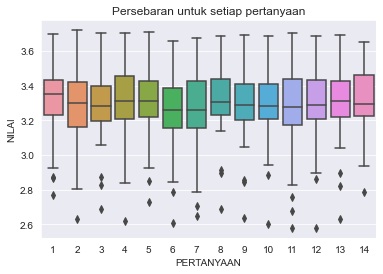

In [132]:
sns.boxplot(x='PERTANYAAN',y='NILAI',data=df_dos.groupby(['KODE_MK','PERTANYAAN'])[['NILAI']].mean().reset_index())  #banyak outlier jadi pake robust scaler
plt.title('Persebaran untuk setiap pertanyaan')
plt.show()

<AxesSubplot:ylabel='NILAI'>

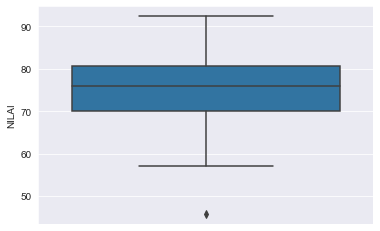

In [133]:
sns.boxplot(y=df_dosqa_cop['NILAI'])

In [134]:
#karena banyak outlier akan digukana robust outlier 
colqa=df_dosqa_mean.drop('KODE_MK',axis=1).columns
scaler = RobustScaler()
df_dosqa_mean[colqa] = scaler.fit_transform(df_dosqa_mean[colqa])


C:\Users\Adiwena\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Adiwena\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


C:\Users\Adiwena\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Adiwena\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Adiwena\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Adiwena\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by

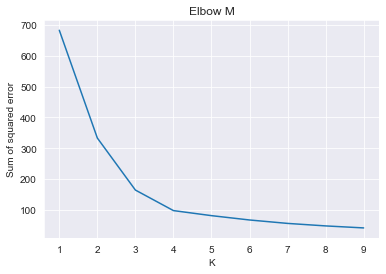

In [135]:
#kmeans
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_dosqa_mean[colqa])
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.title('Elbow M')
plt.plot(k_rng,sse) #pilih 3 sebagai cluster berdasarkan metode elbow method

In [136]:
kmeans = KMeans(n_clusters=3,random_state=0)
df_dosqa_mean['clus']=kmeans.fit_predict(df_dosqa_mean[colqa])


C:\Users\Adiwena\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Adiwena\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [137]:
df_dosqa_mean['clus'].value_counts()

1    35
0    12
2     3
Name: clus, dtype: int64

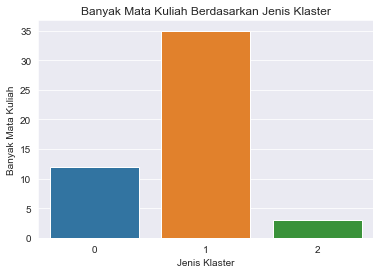

In [138]:
sns.countplot(data=df_dosqa_mean,x='clus')
plt.title('Banyak Mata Kuliah Berdasarkan Jenis Klaster')
plt.xlabel('Jenis Klaster')
plt.ylabel('Banyak Mata Kuliah')
plt.show()

#### penyelidikan sifat cluster

In [139]:

df_15_18=df_ori[df_ori.SEMESTER.isin(df_dos['SEMESTER'].unique())] 
df_15_18=df_15_18[df_15_18['KODE_MK'].isin(df_dos['KODE_MK'].unique())]
df_clus=df_15_18.merge(df_dosqa_mean[['KODE_MK','clus']],on='KODE_MK')
df_clus.rename(columns={'clus':'clus_mk'},inplace=True)
df_clus.head()

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE,BOBOT_NILAI,BOBOTxSKS,clus_mk
0,10110310026,2010,1511,IS302,Konsep Sistem Operasi,3,72.0,B,3.0,9.0,2
1,11110310012,2011,1511,IS302,Konsep Sistem Operasi,3,62.0,C+,2.3,6.9,2
2,11110310022,2011,1511,IS302,Konsep Sistem Operasi,3,64.0,C+,2.3,6.9,2
3,11110310039,2011,1721,IS302,Konsep Sistem Operasi,3,54.0,D,1.0,3.0,2
4,11110310082,2011,1611,IS302,Konsep Sistem Operasi,3,52.0,D,1.0,3.0,2


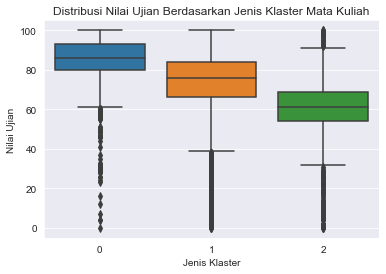

In [140]:
sns.boxplot(data=df_clus,x='clus_mk',y='NILAI')  #0 matkul yang paling hard , 1 matkulnormal, 2 matkul ez
plt.title('Distribusi Nilai Ujian Berdasarkan Jenis Klaster Mata Kuliah')
plt.xlabel('Jenis Klaster')
plt.ylabel('Nilai Ujian')
plt.show()

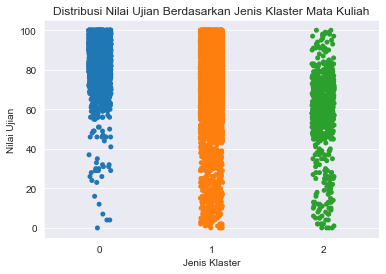

In [141]:
sns.stripplot(data=df_clus,x='clus_mk',y='NILAI')
plt.title('Distribusi Nilai Ujian Berdasarkan Jenis Klaster Mata Kuliah')
plt.xlabel('Jenis Klaster')
plt.ylabel('Nilai Ujian')
plt.show() 

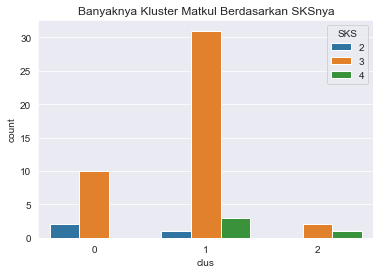

In [142]:
sns.countplot(data=df_dosqa_mean.merge(df_clus[['KODE_MK','SKS']],on='KODE_MK').drop_duplicates(),x='clus',hue='SKS')
plt.title('Banyaknya Kluster Matkul Berdasarkan SKSnya')
plt.show()

In [143]:
#persentase kadar index tiap cluster
df_mk=df_clus.groupby(['clus_mk','GRADE'])[['NIM']].count()
df_mk.rename(columns={'NIM':'count'},inplace=True)
df_mk['presentase']=df_mk.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

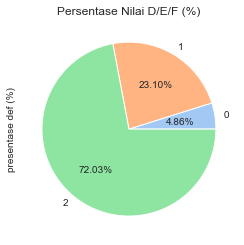

In [144]:
#cari presentase total d e,f
df_tot=df_mk.reset_index()[df_mk.reset_index()['GRADE'].isin(['D','E','F'])].groupby('clus_mk').sum()   #kadar d,e,f berdasarkan cluster
df_tot.rename(columns={'presentase':'presentase def (%)'},inplace=True)
df_tot['presentase def (%)'].plot(kind='pie',autopct='%.2f%%',colors=colors)
plt.title('Persentase Nilai D/E/F (%)')
plt.show()
#persentase kadaer d,e,f matkul 2 paling besar yaitu 26.2 % dan kluster 0 paling sedikit yaitu 1.77 %

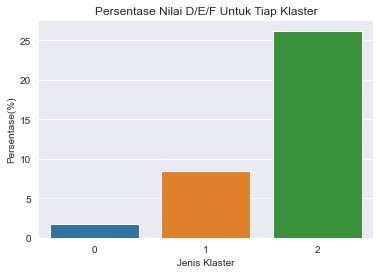

In [145]:
sns.barplot(data=df_tot,x=df_tot.index,y='presentase def (%)')
plt.title('Persentase Nilai D/E/F Untuk Tiap Klaster')
plt.xlabel('Jenis Klaster')
plt.ylabel('Persentase(%)')
plt.show()

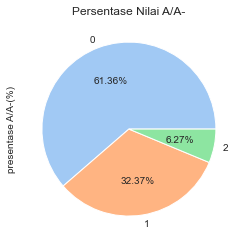

In [146]:
#cari presentase total A
df_tot=df_mk.reset_index()[df_mk.reset_index()['GRADE'].isin(['A','A-'])].groupby('clus_mk').sum()   #kadar d,e,f berdasarkan cluster
df_tot.rename(columns={'presentase':'presentase A/A-(%)'},inplace=True)
df_tot['presentase A/A-(%)'].plot(kind='pie',autopct='%.2f%%',colors=colors)
plt.title('Persentase Nilai A/A-')
plt.show()
#persentase kadaer A matkul 0 paling besar yaitu 76.3 % dan kluster 1 paling sedikit yaitu 7.88%

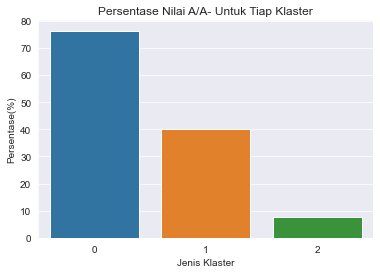

In [147]:
sns.barplot(data=df_tot,x=df_tot.index,y='presentase A/A-(%)')
plt.title('Persentase Nilai A/A- Untuk Tiap Klaster')
plt.xlabel('Jenis Klaster')
plt.ylabel('Persentase(%)')
plt.show()

Dengan demikian cluster mempunyai hubungan yang kuat dengan nilai ujian terlihat pada boxplot di atas dan persentase indexnya. Jadi cluster yang terbentuk adalah:
- cluster 0: matkul yang cenderung gampang 
- cluser 1: matkul yang medioker , dicurigai banyak matkul wajib diambil pada kluster 1
- cluster 2: matkul yang susah  

### Penyelidikan Untuk Matkul kluster 2 

In [148]:
df_dosqa_mean[df_dosqa_mean['clus']==2]    #matkul matkul yang dianggap kluster susah

,KODE_MK,NILAI,1,2,3,4,5,6,7,8,9,10,11,12,13,14,clus
10,IS255,-2.823827,-2.869841,-2.714770,-2.877187,-3.024658,-2.871901,-3.035503,-2.336520,-3.299663,-3.186335,-3.507721,-2.808125,-3.223235,-3.473461,-2.217248,2
11,IS302,-1.270458,-2.387302,-2.002906,-2.187956,-2.060274,-2.276860,-2.183432,-1.820268,-2.195286,-2.167702,-2.031993,-2.082928,-1.947608,-2.505308,-1.446606,2
18,IS431,-1.161482,-2.336508,-1.901211,-1.966418,-1.950685,-1.904959,-1.923077,-1.456979,-2.101010,-2.118012,-1.747203,-1.800906,-1.776765,-2.110403,-1.567706,2


In [149]:
b=df_dosqa_cop[df_dosqa_cop.KODE_MK.isin(['IS255','IS302','IS431'])] #dapat diniali rata -rata cenderung jelek
for i in range (1,15):
    b.rename(columns={i:'Rataan Nilai Pertanyaan '+str(i)},inplace=True)

b.rename(columns={'NILAI':'Rataan Nilai Ujian'},inplace=True)
b[['KODE_MK','Rataan Nilai Pertanyaan 8','Rataan Nilai Pertanyaan 9','Rataan Nilai Pertanyaan 10','Rataan Nilai Pertanyaan 11','Rataan Nilai Pertanyaan 12','Rataan Nilai Pertanyaan 13','Rataan Nilai Pertanyaan 14']]

C:\Users\Adiwena\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,KODE_MK,Rataan Nilai Pertanyaan 8,Rataan Nilai Pertanyaan 9,Rataan Nilai Pertanyaan 10,Rataan Nilai Pertanyaan 11,Rataan Nilai Pertanyaan 12,Rataan Nilai Pertanyaan 13,Rataan Nilai Pertanyaan 14
10,IS255,2.6900,2.640,2.600,2.58,2.5800,2.6300,2.7900
11,IS302,2.8950,2.845,2.885,2.76,2.8600,2.8200,2.9650
18,IS431,2.9125,2.855,2.940,2.83,2.8975,2.8975,2.9375


<ipython-input-150-9c7ed97520c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['Rataan Nilai Evaluasi']=(b[1]+b[2]+b[3]+b[4]+b[5]+b[6]+b[7]+b[8]+b[9]+b[10]+b[11]+b[12]+b[13]+b[14])/14
C:\Users\Adiwena\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


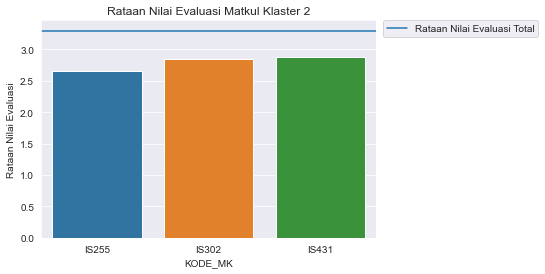

In [150]:
b=df_dosqa_cop[df_dosqa_cop.KODE_MK.isin(['IS255','IS302','IS431'])]
b['Rataan Nilai Evaluasi']=(b[1]+b[2]+b[3]+b[4]+b[5]+b[6]+b[7]+b[8]+b[9]+b[10]+b[11]+b[12]+b[13]+b[14])/14
b.rename(columns={'NILAI':'Rataan Nilai Ujian'},inplace=True)
b=b[['KODE_MK','Rataan Nilai Ujian','Rataan Nilai Evaluasi']]

a=df_dosqa_cop
a['Rataan Nilai Evaluasi']=(a[1]+a[2]+a[3]+a[4]+a[5]+a[6]+a[7]+a[8]+a[9]+a[10]+a[11]+a[12]+a[13]+a[14])/14
a.rename(columns={'NILAI':'Rataan Nilai Ujian'},inplace=True)
a=a[['KODE_MK','Rataan Nilai Ujian','Rataan Nilai Evaluasi']]
mean_nilai_ujian=a['Rataan Nilai Ujian'].mean()
mean_nilai_eval=a['Rataan Nilai Evaluasi'].mean()

plt.axhline(mean_nilai_eval,label='Rataan Nilai Evaluasi Total')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
sns.barplot(x=b['KODE_MK'],y=b['Rataan Nilai Evaluasi'])
plt.title('Rataan Nilai Evaluasi Matkul Klaster 2')
plt.show()

In [151]:
#banyak matku cluster 0 yang diambil pada tabel mahasiswa
df_ori[df_ori.KODE_MK.isin(['IS255','IS302','IS431'])]['KODE_MK'].value_counts()

IS431    367
IS302    264
IS255    197
Name: KODE_MK, dtype: int64

In [152]:
df_clus[df_clus.clus_mk==2]

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE,BOBOT_NILAI,BOBOTxSKS,clus_mk
0,10110310026,2010,1511,IS302,Konsep Sistem Operasi,3,72.0,B,3.0,9.0,2
1,11110310012,2011,1511,IS302,Konsep Sistem Operasi,3,62.0,C+,2.3,6.9,2
2,11110310022,2011,1511,IS302,Konsep Sistem Operasi,3,64.0,C+,2.3,6.9,2
3,11110310039,2011,1721,IS302,Konsep Sistem Operasi,3,54.0,D,1.0,3.0,2
4,11110310082,2011,1611,IS302,Konsep Sistem Operasi,3,52.0,D,1.0,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...
11066,33603,2018,1821,IS255,Algoritma dan Struktur Data,4,31.0,E,0.0,0.0,2
11067,33607,2018,1821,IS255,Algoritma dan Struktur Data,4,26.0,E,0.0,0.0,2
11068,33657,2018,1821,IS255,Algoritma dan Struktur Data,4,51.0,D,1.0,4.0,2
11069,33708,2018,1821,IS255,Algoritma dan Struktur Data,4,54.0,D,1.0,4.0,2


In [153]:
df_ori[df_ori.KODE_MK.isin(['IS255','IS302','IS431'])]['SEMESTER'].value_counts() #MATKUL KLUSTER 2 MEMANG MAYORITAS DIAMBIL PADA  TAHUN AJARAN 2015-2018,HANYA 8 DATA YANG DIAMBIL PADA TAHUN 2014

1821    317
1621    111
1721    106
1511     93
1521     89
1611     55
1711     49
1421      8
Name: SEMESTER, dtype: int64

C:\Users\Adiwena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NILAI'>

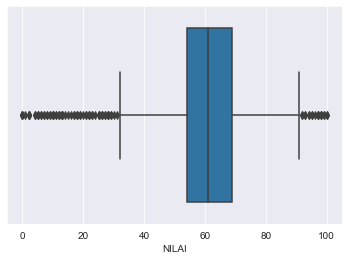

In [154]:
sns.boxplot(df_clus[df_clus.clus_mk==2]['NILAI'])


# Modeling Memprediksi kelulusan tepat waktu

### pembuatan data set untuk memprediksi kelulusan tepat waktu

In [155]:
df_sks=df_ori.groupby(['NIM'])[['BOBOTxSKS']].count()
print(df_sks.shape)
df_sks.head()  #banyak matkul yang diambil


(770, 1)


,BOBOTxSKS
NIM,
10064,51
10082,49
10110310002,49
10110310004,50
10110310005,49


In [156]:
#presentase untuk index untuk matkul 2 sks yang diambil
df_2sks=df_ori[df_ori['SKS']==2]
df_2sks=df_2sks.groupby(['NIM','GRADE'])[['BOBOTxSKS']].count()
df_2sks.rename(columns={'BOBOTxSKS':'count2SKS'},inplace=True)
#df_2sks['count2SKS']=df_2sks.groupby(level=0).apply(lambda x: x / float(x.sum()))
df_2sks=pd.pivot_table(data=df_2sks,index='NIM',values='count2SKS',columns='GRADE')
df_2sks.fillna(0,inplace=True)
df_2sks.columns=['A_2sks','A-_2sks','B_2sks','B+_2sks','B-_2sks','C_2sks','C+_2sks','D_2sks','E_2sks','F_2sks']
print(df_2sks.shape)
df_2sks.head()


(770, 10)


,A_2sks,A-_2sks,B_2sks,B+_2sks,B-_2sks,C_2sks,C+_2sks,D_2sks,E_2sks,F_2sks
NIM,,,,,,,,,,
10064,5.0,5.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
10082,2.0,3.0,2.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0
10110310002,3.0,0.0,4.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
10110310004,5.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
10110310005,7.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [157]:
#presentase untuk index untuk matkul 3 sks yang diambil
df_3sks=df_ori[df_ori['SKS']==3]
df_3sks=df_3sks.groupby(['NIM','GRADE'])[['BOBOTxSKS']].count()
df_3sks.rename(columns={'BOBOTxSKS':'count3SKS'},inplace=True)
#df_3sks['count3SKS']=df_3sks.groupby(level=0).apply(lambda x: x / float(x.sum()))
df_3sks=pd.pivot_table(data=df_3sks,index='NIM',values='count3SKS',columns='GRADE')
df_3sks.fillna(0,inplace=True)
df_3sks.columns=['A_3sks','A-_3sks','B_3sks','B+_3sks','B-_3sks','C_3sks','C+_3sks','D_3sks','E_3sks','F_3sks']
print(df_3sks.shape)
df_3sks.head()


(770, 10)


,A_3sks,A-_3sks,B_3sks,B+_3sks,B-_3sks,C_3sks,C+_3sks,D_3sks,E_3sks,F_3sks
NIM,,,,,,,,,,
10064,18.0,10.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0
10082,12.0,6.0,3.0,6.0,2.0,5.0,1.0,1.0,0.0,0.0
10110310002,6.0,0.0,14.0,0.0,0.0,12.0,0.0,1.0,0.0,0.0
10110310004,10.0,0.0,8.0,2.0,0.0,13.0,0.0,2.0,0.0,0.0
10110310005,22.0,0.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [158]:
#presentase untuk index untuk matkul 4 sks yang diambil
df_4sks=df_ori[df_ori['SKS']==4]
df_4sks=df_4sks.groupby(['NIM','GRADE'])[['BOBOTxSKS']].count()
df_4sks.rename(columns={'BOBOTxSKS':'count2SKS'},inplace=True)
#df_2sks['count2SKS']=df_2sks.groupby(level=0).apply(lambda x: x / float(x.sum()))
df_4sks=pd.pivot_table(data=df_4sks,index='NIM',values='count2SKS',columns='GRADE')
df_4sks.fillna(0,inplace=True)
df_4sks.columns=['A_4sks','A-_4sks','B_4sks','B+_4sks','B-_4sks','C_4sks','C+_4sks','D_4sks','E_4sks']
print(df_4sks.shape)
df_4sks.head()


(731, 9)


,A_4sks,A-_4sks,B_4sks,B+_4sks,B-_4sks,C_4sks,C+_4sks,D_4sks,E_4sks
NIM,,,,,,,,,
10064,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10082,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10110310002,2.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0
10110310004,0.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0
10110310005,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [159]:
#presentase untuk index untuk matkul 6 sks yang diambil
df_6sks=df_ori[df_ori['SKS']==6]
df_6sks=df_6sks.groupby(['NIM','GRADE'])[['BOBOTxSKS']].count()
df_6sks.rename(columns={'BOBOTxSKS':'count2SKS'},inplace=True)
#df_2sks['count2SKS']=df_2sks.groupby(level=0).apply(lambda x: x / float(x.sum()))
df_6sks=pd.pivot_table(data=df_6sks,index='NIM',values='count2SKS',columns='GRADE')
df_6sks.fillna(0,inplace=True)
df_6sks.columns=['A_6sks','A-_6sks','B_6sks','B+_6sks','B-_6sks','C_6sks','C+_6sks','E_6sks']
print(df_6sks.shape)
df_6sks.head()


(135, 8)


,A_6sks,A-_6sks,B_6sks,B+_6sks,B-_6sks,C_6sks,C+_6sks,E_6sks
NIM,,,,,,,,
10064,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10110310002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10110310005,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10110310006,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10110310007,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [160]:
df_summk=df_sks.merge(df_2sks,on='NIM')
df_summk=df_summk.merge(df_3sks,on='NIM')
df_summk=df_summk.merge(df_4sks,on='NIM',how='left')
df_summk=df_summk.merge(df_6sks,on='NIM',how='left')
print(df_summk.columns)
print(df_summk.shape)
df_summk.fillna(0,inplace=True)  #berisi data data untuk di train  

Index(['BOBOTxSKS', 'A_2sks', 'A-_2sks', 'B_2sks', 'B+_2sks', 'B-_2sks',
       'C_2sks', 'C+_2sks', 'D_2sks', 'E_2sks', 'F_2sks', 'A_3sks', 'A-_3sks',
       'B_3sks', 'B+_3sks', 'B-_3sks', 'C_3sks', 'C+_3sks', 'D_3sks', 'E_3sks',
       'F_3sks', 'A_4sks', 'A-_4sks', 'B_4sks', 'B+_4sks', 'B-_4sks', 'C_4sks',
       'C+_4sks', 'D_4sks', 'E_4sks', 'A_6sks', 'A-_6sks', 'B_6sks', 'B+_6sks',
       'B-_6sks', 'C_6sks', 'C+_6sks', 'E_6sks'],
      dtype='object')
(770, 38)


In [161]:
df_mean_sks=df_ori.groupby(['NIM'])[['SKS']].sum()
df_lastsm=df_lus[['NIM','SEMESTER_LAST']]
df_lastsm.set_index('NIM',inplace=True)
df_mean_sks=df_lastsm.merge(df_mean_sks,on='NIM')
df_mean_sks['mean_sks']=df_mean_sks['SKS']/df_mean_sks['SEMESTER_LAST']

In [162]:
for i in df_summk.drop('BOBOTxSKS',axis=1).columns:
    df_summk[i]= df_summk[i]/df_summk['BOBOTxSKS']

df_summk.fillna(0,inplace=True)  #berisi data data untuk di train  
df_summk=df_summk.merge(df_mean_sks[['SEMESTER_LAST','mean_sks']],on='NIM')
df_summk=df_summk.merge(df_lus[['NIM','keterangan_lulus']],on='NIM')
df_summk.rename(columns={'BOBOTxSKS':'Banyak_Matkul'},inplace=True)

In [163]:
df_summk

,NIM,Banyak_Matkul,A_2sks,A-_2sks,B_2sks,B+_2sks,B-_2sks,C_2sks,C+_2sks,D_2sks,...,A-_6sks,B_6sks,B+_6sks,B-_6sks,C_6sks,C+_6sks,E_6sks,SEMESTER_LAST,mean_sks,keterangan_lulus
0,10064,51,0.098039,0.098039,0.000000,0.039216,0.019608,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,18.125000,lulus_tepat_waktu
1,10082,49,0.040816,0.061224,0.040816,0.061224,0.000000,0.000000,0.040816,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,19.428571,belum_lulus
2,10110310002,49,0.061224,0.000000,0.081633,0.000000,0.000000,0.061224,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,18.125000,belum_lulus
3,10110310004,50,0.100000,0.000000,0.060000,0.000000,0.000000,0.040000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,14.500000,belum_lulus
4,10110310005,49,0.142857,0.000000,0.061224,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,18.125000,lulus_tepat_waktu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,9780,38,0.026316,0.000000,0.026316,0.000000,0.026316,0.000000,0.078947,0.052632,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,13.375000,belum_lulus
766,9890,45,0.000000,0.000000,0.022222,0.044444,0.066667,0.022222,0.022222,0.044444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,15.625000,belum_lulus
767,9915,46,0.021739,0.065217,0.043478,0.065217,0.000000,0.021739,0.043478,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,15.875000,belum_lulus
768,9931,40,0.050000,0.050000,0.000000,0.000000,0.050000,0.050000,0.075000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,13.750000,belum_lulus


In [164]:
df_time=df_summk.copy(deep=True)
df_time=df_time.merge(df_ori[['NIM','ANGKATAN']],on='NIM',how='left')
df_time.drop_duplicates(inplace=True)
df_time=df_time[df_time.ANGKATAN.isin(['2010','2011','2012','2013','2014','2015'])]
mapping={'lulus_tepat_waktu':1,'lulus_lebih_cepat':1,'lulus_telat':0,'belum_lulus':0} #didefnisikan hanya yang lulus telat dan lulus tepat waktu. Diasumsikan orang yang belum lulus akan lulus juga namun tidak tepat waktu
df_time['keterangan_lulus']=df_time['keterangan_lulus'].replace(mapping)
df_time.head()

,NIM,Banyak_Matkul,A_2sks,A-_2sks,B_2sks,B+_2sks,B-_2sks,C_2sks,C+_2sks,D_2sks,...,B_6sks,B+_6sks,B-_6sks,C_6sks,C+_6sks,E_6sks,SEMESTER_LAST,mean_sks,keterangan_lulus,ANGKATAN
0,10064,51,0.098039,0.098039,0.000000,0.039216,0.019608,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8,18.125000,1,2015
51,10082,49,0.040816,0.061224,0.040816,0.061224,0.000000,0.000000,0.040816,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7,19.428571,0,2015
100,10110310002,49,0.061224,0.000000,0.081633,0.000000,0.000000,0.061224,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8,18.125000,0,2010
149,10110310004,50,0.100000,0.000000,0.060000,0.000000,0.000000,0.040000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10,14.500000,0,2010
199,10110310005,49,0.142857,0.000000,0.061224,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8,18.125000,1,2010


In [165]:
df_time['DEF_2sks']=df_time['D_2sks']+df_time['E_2sks']+df_time['F_2sks']
df_time['DEF_3sks']=df_time['D_3sks']+df_time['E_3sks']+df_time['F_3sks']
df_time['DE_4sks']=df_time['D_4sks']+df_time['E_4sks']

In [166]:
df_time.shape

(434, 46)

In [167]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 434 entries, 0 to 30038
Data columns (total 46 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NIM               434 non-null    object 
 1   Banyak_Matkul     434 non-null    int64  
 2   A_2sks            434 non-null    float64
 3   A-_2sks           434 non-null    float64
 4   B_2sks            434 non-null    float64
 5   B+_2sks           434 non-null    float64
 6   B-_2sks           434 non-null    float64
 7   C_2sks            434 non-null    float64
 8   C+_2sks           434 non-null    float64
 9   D_2sks            434 non-null    float64
 10  E_2sks            434 non-null    float64
 11  F_2sks            434 non-null    float64
 12  A_3sks            434 non-null    float64
 13  A-_3sks           434 non-null    float64
 14  B_3sks            434 non-null    float64
 15  B+_3sks           434 non-null    float64
 16  B-_3sks           434 non-null    float64


In [168]:
X_train, X_test, y_train, y_test = train_test_split(df_time.drop(columns=['NIM','SEMESTER_LAST','ANGKATAN','keterangan_lulus','Banyak_Matkul','D_2sks','E_2sks','F_2sks','D_3sks','E_3sks','F_3sks','D_4sks','E_4sks'],axis=1), df_time['keterangan_lulus'], test_size=0.2, random_state=101)

In [169]:
y_train.value_counts()

0    221
1    126
Name: keterangan_lulus, dtype: int64

In [170]:
scaler = RobustScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

#resampling
smt = SMOTETomek()  #bisa coba dimaximal di sini
X_train, y_train = smt.fit_resample(X_train, y_train)

### Percobaan Model

In [180]:
#logistc regression
logmodel = LogisticRegression(random_state=1)
logmodel.fit(X_train,y_train)
pred=logmodel.predict(X_test)

print('Classification Report Data Test')
print(' ')
print(classification_report(y_test,pred))  
print(' ')
print('Classification Report Data Train')
print(' ')
print(classification_report(y_train,logmodel.predict(X_train)))  

print(confusion_matrix(y_test,pred))
print(' ')
print('ROC AUC SCORE')
y_pred_probs = logmodel.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test, y_pred_probs))

Classification Report Data Test
 
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        49
           1       0.92      0.95      0.94        38

    accuracy                           0.94        87
   macro avg       0.94      0.94      0.94        87
weighted avg       0.94      0.94      0.94        87

 
Classification Report Data Train
 
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       220
           1       0.92      1.00      0.96       220

    accuracy                           0.96       440
   macro avg       0.96      0.96      0.96       440
weighted avg       0.96      0.96      0.96       440

[[46  3]
 [ 2 36]]
 
ROC AUC SCORE
0.9887218045112782


In [182]:
y_test.value_counts()

0    49
1    38
Name: keterangan_lulus, dtype: int64

In [179]:
#dcc tree
dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(X_train,y_train)
pred= dtree.predict(X_test)
print('Classification Report Data Test')
print(' ')
print(classification_report(y_test,pred))  
print(' ')
print('Classification Report Data Train')
print(' ')
print(classification_report(y_train,dtree.predict(X_train)))  

print(confusion_matrix(y_test,pred))
print(' ')
print('ROC AUC SCORE')
y_pred_probs = dtree.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test, y_pred_probs))

Classification Report Data Test
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        38

    accuracy                           1.00        87
   macro avg       1.00      1.00      1.00        87
weighted avg       1.00      1.00      1.00        87

 
Classification Report Data Train
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       220
           1       1.00      1.00      1.00       220

    accuracy                           1.00       440
   macro avg       1.00      1.00      1.00       440
weighted avg       1.00      1.00      1.00       440

[[49  0]
 [ 0 38]]
 
ROC AUC SCORE
1.0


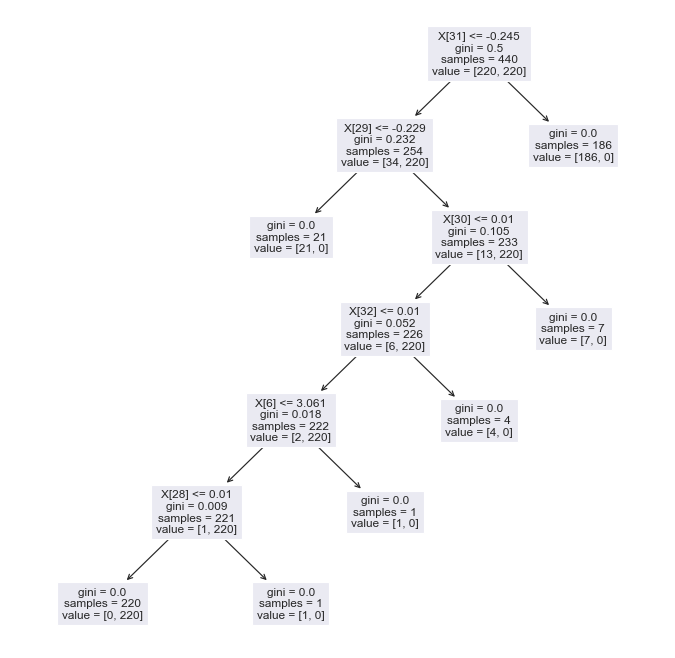

In [183]:
plt.rcParams['figure.dpi']=85
plt.subplots(figsize=(10,10))
tree.plot_tree(dtree,fontsize=10)
plt.show()

In [174]:
#rfc
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print('Classification Report Data Test')
print(' ')
print(classification_report(y_test,rfc_pred))  
print(' ')
print('Classification Report Data Train')
print(' ')
print(classification_report(y_train,rfc.predict(X_train)))  

print(confusion_matrix(y_test,pred))
print(' ')
print('ROC AUC SCORE')
y_pred_probs = rfc.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test, y_pred_probs))

Classification Report Data Test
 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        49
           1       1.00      0.95      0.97        38

    accuracy                           0.98        87
   macro avg       0.98      0.97      0.98        87
weighted avg       0.98      0.98      0.98        87

 
Classification Report Data Train
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       220
           1       1.00      1.00      1.00       220

    accuracy                           1.00       440
   macro avg       1.00      1.00      1.00       440
weighted avg       1.00      1.00      1.00       440

[[49  0]
 [ 0 38]]
 
ROC AUC SCORE
0.9978517722878625


Text(0, 0.5, 'Error Rate')

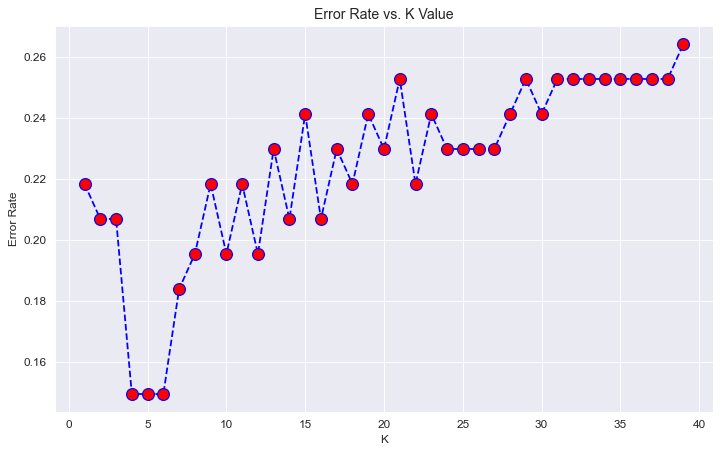

In [175]:
#knn
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [176]:
#knn
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('Classification Report Data Test')
print(' ')
print(classification_report(y_test,pred))  
print(' ')
print('Classification Report Data Train')
print(' ')
print(classification_report(y_train,knn.predict(X_train)))  
print(' ')
print('ROC AUC SCORE')
y_pred_probs = knn.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test, y_pred_probs))

Classification Report Data Test
 
              precision    recall  f1-score   support

           0       0.94      0.63      0.76        49
           1       0.67      0.95      0.78        38

    accuracy                           0.77        87
   macro avg       0.80      0.79      0.77        87
weighted avg       0.82      0.77      0.77        87

 
Classification Report Data Train
 
              precision    recall  f1-score   support

           0       0.97      0.72      0.83       220
           1       0.78      0.98      0.87       220

    accuracy                           0.85       440
   macro avg       0.87      0.85      0.85       440
weighted avg       0.87      0.85      0.85       440

 
ROC AUC SCORE
0.9103114930182599


In [177]:
#svc
model = SVC(kernel='linear',random_state=1,probability=True)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print('Classification Report Data Test')
print(' ')
print(classification_report(y_test,predictions))  
print(' ')
print('Classification Report Data Train')
print(' ')
print(classification_report(y_train,model.predict(X_train)))  
print(' ')
print('ROC AUC SCORE')
y_pred_probs = model.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test, y_pred_probs))

Classification Report Data Test
 
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        49
           1       0.93      1.00      0.96        38

    accuracy                           0.97        87
   macro avg       0.96      0.97      0.97        87
weighted avg       0.97      0.97      0.97        87

 
Classification Report Data Train
 
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       220
           1       0.93      1.00      0.96       220

    accuracy                           0.96       440
   macro avg       0.97      0.96      0.96       440
weighted avg       0.97      0.96      0.96       440

 
ROC AUC SCORE
0.9881847475832438


In [357]:
y_pred_probs = model.predict_proba(X_test)[:, 1]

### Feature Importance

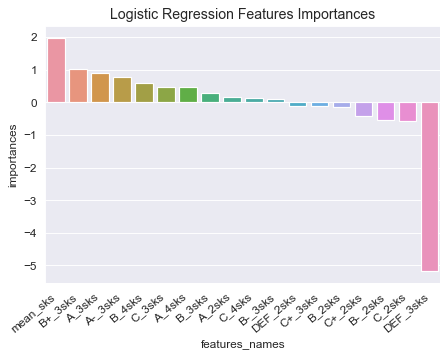

In [358]:
#feature importance  dari logistic regression
fit=pd.DataFrame({'features_names':df_time.drop(columns=['NIM','SEMESTER_LAST','ANGKATAN','keterangan_lulus','Banyak_Matkul','D_2sks','E_2sks','F_2sks','D_3sks','E_3sks','F_3sks','D_4sks','E_4sks'],axis=1).columns,'importances':logmodel.coef_[0]})
fit=fit.sort_values(by='importances',ascending=False)  #ta diangap tidak terlalu berpengaruh pada kelulusan tepat waktu
fit=fit[(fit['importances']>=0.1)|(fit['importances']<=-0.1)]
ax=sns.barplot(x=fit['features_names'],y=fit['importances'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Logistic Regression Features Importances')
plt.show()

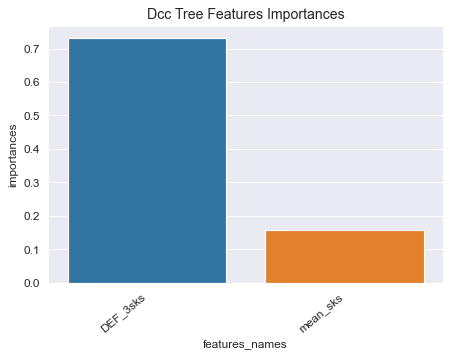

In [359]:
#feature importance dari dcc tree
fit=pd.DataFrame({'features_names':df_time.drop(columns=['NIM','SEMESTER_LAST','ANGKATAN','keterangan_lulus','Banyak_Matkul','D_2sks','E_2sks','F_2sks','D_3sks','E_3sks','F_3sks','D_4sks','E_4sks'],axis=1).columns,'importances': dtree.feature_importances_})
fit=fit.sort_values(by='importances',ascending=False)
fit=fit[(fit['importances']>=0.1)]
ax=sns.barplot(x=fit['features_names'],y=fit['importances'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Dcc Tree Features Importances')
plt.show()

In [ ]:
dtree.feature_importances_

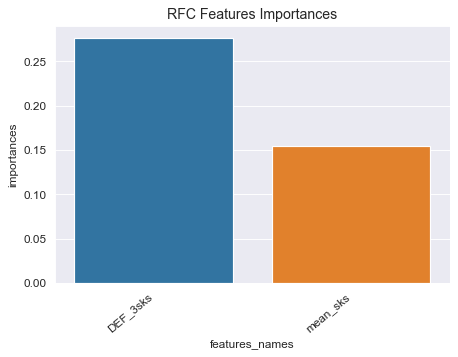

In [360]:
#feature importance dari random forest
fit=pd.DataFrame({'features_names':df_time.drop(columns=['NIM','SEMESTER_LAST','ANGKATAN','keterangan_lulus','Banyak_Matkul','D_2sks','E_2sks','F_2sks','D_3sks','E_3sks','F_3sks','D_4sks','E_4sks'],axis=1).columns,'importances': rfc.feature_importances_})
fit.sort_values(by='importances',ascending=False)
fit=fit[(fit['importances']>=0.1)]
fit=fit.sort_values(by='importances',ascending=False)

ax=sns.barplot(x=fit['features_names'],y=fit['importances'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('RFC Features Importances')
plt.show()

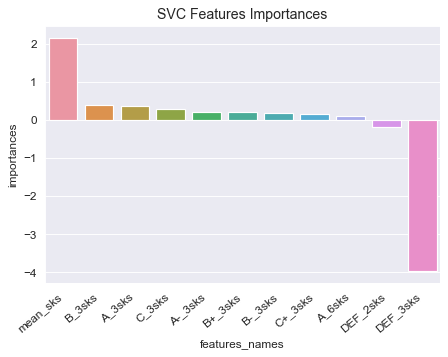

In [361]:
#svc features importances
fit=pd.DataFrame({'features_names':df_time.drop(columns=['NIM','SEMESTER_LAST','ANGKATAN','keterangan_lulus','Banyak_Matkul','D_2sks','E_2sks','F_2sks','D_3sks','E_3sks','F_3sks','D_4sks','E_4sks'],axis=1).columns,'importances':model.coef_[0]})
fit.sort_values(by='importances',ascending=False)
fit=fit[(fit['importances']>=0.1)|(fit['importances']<=-0.1)]
fit=fit.sort_values(by='importances',ascending=False)

ax=sns.barplot(x=fit['features_names'],y=fit['importances'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('SVC Features Importances')
plt.show()

Berdasarkan berbagai jenis model yang dipakai untuk memprediksi kelulusan tepat waktu didapat kesimpulan
- Mean Sks dan  pesentase index pada matkul 3 sks adalah variabel yang paling berpengaruh terhadap kelulusan tepat waktu mahasiswa

### Penyelidikan pengaruh mean_sks pada kelulusan tepat waktu 

In [362]:
df_tim=df_time.copy(deep=True)
df_tim['keterangan_lulus']=df_tim['keterangan_lulus'].astype('str')

Text(0.5, 1.0, 'Persebaran Rataan SKS Berdasarkan Status Kelulusan')

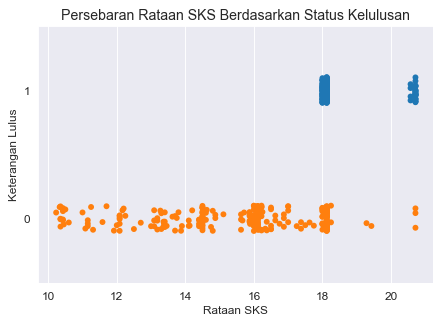

In [363]:
sns.stripplot(data=df_tim,x='mean_sks',y='keterangan_lulus')  
plt.xlabel('Rataan SKS')
plt.ylabel('Keterangan Lulus')
plt.title('Persebaran Rataan SKS Berdasarkan Status Kelulusan')
#rata rata  orang yang lulus tepat waktu mengambil rata rata setiap semester 18 sks atau >20 sks
#rata rata sks yang diambil setiap semester oleh orang yang lulus telat tersebar di antara 10 -20 sks

### Penyelidikan Matkul 3 sks 

In [364]:
#proporsi banyaknya jenis sks yang diambil untuk tiap angkatan
df_cun_sks=df_ori.groupby(['ANGKATAN','SKS'])[['NIM']].count()
df_cun_sks['pres(%)']=df_cun_sks.groupby(level=0).apply(lambda x: 100*x/float(x.sum()))
df_cun_sks.rename(columns={'NIM':'count'},inplace=True)
df_cun_sks #pada setiap angkatan mayoritas matkul 3 sks paling banyak diambil 

count    pres(%)
ANGKATAN SKS                  
2010     2      645  20.430789
         3     2149  68.070953
         4      316  10.009503
         6       47   1.488755
2011     2      686  20.206186
         3     2374  69.926362
         4      322   9.484536
         6       13   0.382916
2012     2      405  20.229770
         3     1417  70.779221
         4      177   8.841159
         6        3   0.149850
2013     2      715  18.423087
         3     2935  75.624839
         4      223   5.745942
         6        8   0.206132
2014     2     1114  24.955197
         3     3173  71.079749
         4      163   3.651434
         6       14   0.313620
2015     2     1193  25.694594
         3     3242  69.825544
         4      158   3.402972
         6       50   1.076890
2016     2      896  26.391753
         3     2427  71.487482
         4       72   2.120766
2017     2      988  31.535270
         3     2018  64.411108
         4      127   4.053623
2018     2      576  28.571429
         3     1152  57.142857
         4      288  14.285714

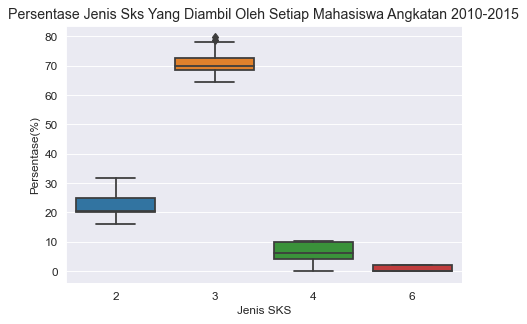

In [365]:
#presentase banyak nya matkul dengan jenis sks tertentu untuk setiap nim
df_1510=df_ori[df_ori['ANGKATAN'].isin(['2010','2011','2012','2013','2014','2015'])]
df_1510=df_1510.groupby(['NIM','SKS'])[['NILAI']].count()
df_1510['pres']=df_1510.groupby(level=0).apply(lambda x: 100*x/float(x.sum()))
df_1510=pd.pivot_table(data=df_1510,values='pres',index='NIM',columns='SKS',fill_value=0)
sns.boxplot(data=df_1510)
plt.title('Persentase Jenis Sks Yang Diambil Oleh Setiap Mahasiswa Angkatan 2010-2015')
plt.ylabel('Persentase(%)')
plt.xlabel('Jenis SKS')
plt.show()
#setiap mahasiswa mayoritas mengambil matkul 3sks dengan proporsi 65%-80%

presentase index matkul 3 sks paling berpengaruh terhadap kelulusan tepat waktu karena setiap mahasiswa cenderung lebih banyak mengambil mata kuliah 3sks

### Tren Kelulusan

In [366]:
df_luscop=df_lus.copy(deep=True)
mapping={'lulus_tepat_waktu':'lulus_tepat_waktu','lulus_lebih_cepat':'lulus_tepat_waktu','belum_lulus':'lulus_telat','lulus_telat':'lulus_telat'}
df_luscop['keterangan_lulus']=df_luscop['keterangan_lulus'].replace(mapping)
df_10=df_luscop[df_luscop['ANGKATAN']=='2010']
df_11=df_luscop[df_luscop['ANGKATAN']=='2011']
df_12=df_luscop[df_luscop['ANGKATAN']=='2012']
df_13=df_luscop[df_luscop['ANGKATAN']=='2013']
df_14=df_luscop[df_luscop['ANGKATAN']=='2014']
df_15=df_luscop[df_luscop['ANGKATAN']=='2015']


In [367]:
df2010_15=df_luscop[df_luscop.ANGKATAN.isin(['2010','2011','2012','2013','2014','2015'])].groupby(['ANGKATAN','keterangan_lulus'])[['NIM']].count()
df2010_15.rename(columns={'NIM':'count'},inplace=True)
df2010_15['pres(%)']=df2010_15.groupby(level=0).apply(lambda x: 100*x/float(x.sum()))
df2010_15.reset_index()

,ANGKATAN,keterangan_lulus,count,pres(%)
0,2010,lulus_telat,37,57.812500
1,2010,lulus_tepat_waktu,27,42.187500
2,2011,lulus_telat,37,54.411765
3,2011,lulus_tepat_waktu,31,45.588235
4,2012,lulus_telat,20,50.000000
5,2012,lulus_tepat_waktu,20,50.000000
6,2013,lulus_telat,39,50.000000
7,2013,lulus_tepat_waktu,39,50.000000
8,2014,lulus_telat,65,73.863636
9,2014,lulus_tepat_waktu,23,26.136364


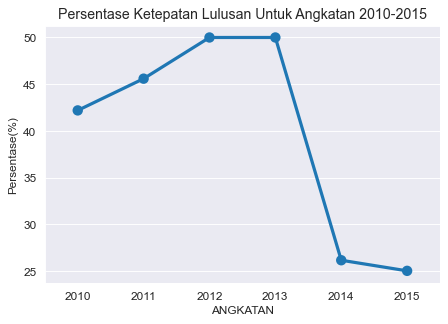

In [368]:
sns.pointplot(data=df2010_15.reset_index()[df2010_15.reset_index()['keterangan_lulus']=='lulus_tepat_waktu'],y='pres(%)',x='ANGKATAN')
plt.title('Persentase Ketepatan Lulusan Untuk Angkatan 2010-2015')
plt.ylabel('Persentase(%)')
plt.show()

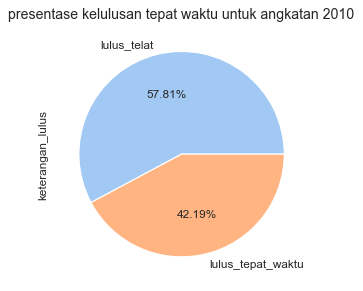

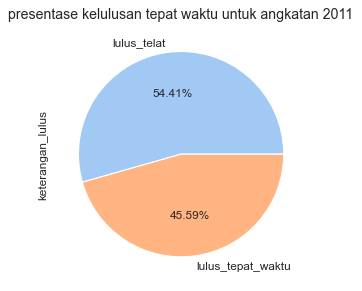

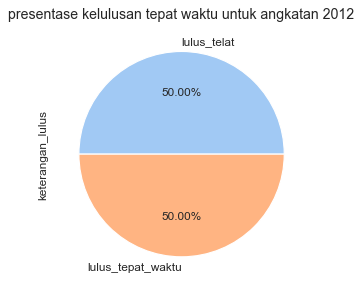

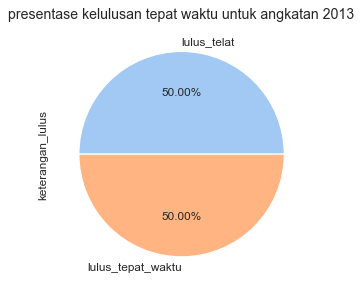

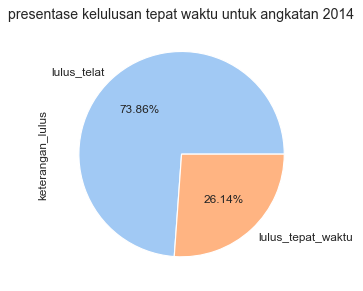

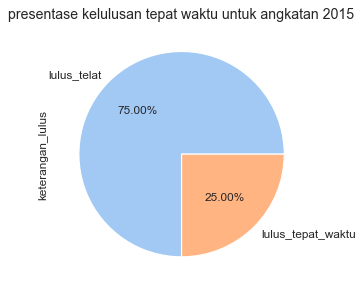

In [369]:
colors = sns.color_palette('pastel')[0:5]
df_10['keterangan_lulus'].value_counts().plot(kind='pie',autopct='%.2f%%',colors=colors)
plt.title('presentase kelulusan tepat waktu untuk angkatan 2010')
plt.show()
colors = sns.color_palette('pastel')[0:5]
df_11['keterangan_lulus'].value_counts().plot(kind='pie',autopct='%.2f%%',colors=colors)
plt.title('presentase kelulusan tepat waktu untuk angkatan 2011')
plt.show()
colors = sns.color_palette('pastel')[0:5]
df_12['keterangan_lulus'].value_counts().plot(kind='pie',autopct='%.2f%%',colors=colors)
plt.title('presentase kelulusan tepat waktu untuk angkatan 2012')
plt.show()
colors = sns.color_palette('pastel')[0:5]
df_13['keterangan_lulus'].value_counts().plot(kind='pie',autopct='%.2f%%',colors=colors)
plt.title('presentase kelulusan tepat waktu untuk angkatan 2013')
plt.show()
colors = sns.color_palette('pastel')[0:5]
df_14['keterangan_lulus'].value_counts().plot(kind='pie',autopct='%.2f%%',colors=colors)
plt.title('presentase kelulusan tepat waktu untuk angkatan 2014')
plt.show()
colors = sns.color_palette('pastel')[0:5]
df_15['keterangan_lulus'].value_counts().plot(kind='pie',autopct='%.2f%%',colors=colors)
plt.title('presentase kelulusan tepat waktu untuk angkatan 2015')
plt.show()

# Prediksi

In [370]:
mod=logmodel  #masukkan antara logmodel/dtree/rfc/model

### Prediksi Data Tahun 2016

In [371]:
df_time=df_summk.copy(deep=True)
df_time=df_time.merge(df_ori[['NIM','ANGKATAN']],on='NIM',how='left')
df_time.drop_duplicates(inplace=True)
df_time=df_time[df_time.ANGKATAN.isin(['2016'])]
mapping={'lulus_tepat_waktu':1,'lulus_lebih_cepat':1,'lulus_telat':0,'belum_lulus':0}
df_time['keterangan_lulus']=df_time['keterangan_lulus'].replace(mapping)
df_time['DEF_2sks']=df_time['D_2sks']+df_time['E_2sks']+df_time['F_2sks']
df_time['DEF_3sks']=df_time['D_3sks']+df_time['E_3sks']+df_time['F_3sks']
df_time['DE_4sks']=df_time['D_4sks']+df_time['E_4sks']
train=scaler.transform(df_time.drop(columns=['NIM','Banyak_Matkul','SEMESTER_LAST','keterangan_lulus','ANGKATAN','D_2sks','E_2sks','F_2sks','D_3sks','E_3sks','F_3sks','D_4sks','E_4sks'],axis=1))

mudel16=pd.DataFrame({'NIM':df_time['NIM'],'keterangan_lulus':mod.predict(train)})
mapping={0:'lulus_telat',1:'lulus_tepat_waktu'}
mudel16['keterangan_lulus']=mudel16['keterangan_lulus'].replace(mapping)
mudel16['ANGKATAN']=2016
mudel16= mudel16.groupby(['ANGKATAN','keterangan_lulus']).count()
mudel16.rename(columns={'NIM':'count'},inplace=True)
mudel16['pres(%)']=mudel16.groupby(level=0).apply(lambda x: 100*x/float(x.sum()))
mudel16=mudel16.reset_index()
mudel16.head()

,ANGKATAN,keterangan_lulus,count,pres(%)
0,2016,lulus_telat,65,76.470588
1,2016,lulus_tepat_waktu,20,23.529412


### Prediksi Data Tahun 2017

In [372]:
df_time=df_summk.copy(deep=True)
df_time=df_time.merge(df_ori[['NIM','ANGKATAN']],on='NIM',how='left')
df_time.drop_duplicates(inplace=True)
df_time=df_time[df_time.ANGKATAN.isin(['2017'])]
mapping={'lulus_tepat_waktu':1,'lulus_lebih_cepat':1,'lulus_telat':0,'belum_lulus':0}
df_time['keterangan_lulus']=df_time['keterangan_lulus'].replace(mapping)
df_time['DEF_2sks']=df_time['D_2sks']+df_time['E_2sks']+df_time['F_2sks']
df_time['DEF_3sks']=df_time['D_3sks']+df_time['E_3sks']+df_time['F_3sks']
df_time['DE_4sks']=df_time['D_4sks']+df_time['E_4sks']
train=scaler.transform(df_time.drop(columns=['NIM','Banyak_Matkul','SEMESTER_LAST','keterangan_lulus','ANGKATAN','D_2sks','E_2sks','F_2sks','D_3sks','E_3sks','F_3sks','D_4sks','E_4sks'],axis=1))

mudel17=pd.DataFrame({'NIM':df_time['NIM'],'keterangan_lulus':mod.predict(train)})
mapping={0:'lulus_telat',1:'lulus_tepat_waktu'}
mudel17['keterangan_lulus']=mudel17['keterangan_lulus'].replace(mapping)
mudel17['ANGKATAN']=2017
mudel17= mudel17.groupby(['ANGKATAN','keterangan_lulus']).count()
mudel17.rename(columns={'NIM':'count'},inplace=True)
mudel17['pres(%)']=mudel17.groupby(level=0).apply(lambda x: 100*x/float(x.sum()))
mudel17=mudel17.reset_index()
mudel17.head()

,ANGKATAN,keterangan_lulus,count,pres(%)
0,2017,lulus_telat,81,75.700935
1,2017,lulus_tepat_waktu,26,24.299065


### Prediksi Model tahun 2018

In [373]:
df_time=df_summk.copy(deep=True)
df_time=df_time.merge(df_ori[['NIM','ANGKATAN']],on='NIM',how='left')
df_time.drop_duplicates(inplace=True)
df_time=df_time[df_time.ANGKATAN.isin(['2018'])]
mapping={'lulus_tepat_waktu':1,'lulus_lebih_cepat':1,'lulus_telat':0,'belum_lulus':0}
df_time['keterangan_lulus']=df_time['keterangan_lulus'].replace(mapping)
df_time['DEF_2sks']=df_time['D_2sks']+df_time['E_2sks']+df_time['F_2sks']
df_time['DEF_3sks']=df_time['D_3sks']+df_time['E_3sks']+df_time['F_3sks']
df_time['DE_4sks']=df_time['D_4sks']+df_time['E_4sks']
train=scaler.transform(df_time.drop(columns=['NIM','Banyak_Matkul','SEMESTER_LAST','keterangan_lulus','ANGKATAN','D_2sks','E_2sks','F_2sks','D_3sks','E_3sks','F_3sks','D_4sks','E_4sks'],axis=1))

mudel18=pd.DataFrame({'NIM':df_time['NIM'],'keterangan_lulus':mod.predict(train)})
mapping={0:'lulus_telat',1:'lulus_tepat_waktu'}
mudel18['keterangan_lulus']=mudel18['keterangan_lulus'].replace(mapping)
mudel18['ANGKATAN']=2018
mudel18= mudel18.groupby(['ANGKATAN','keterangan_lulus']).count()
mudel18.rename(columns={'NIM':'count'},inplace=True)
mudel18['pres(%)']=mudel18.groupby(level=0).apply(lambda x: 100*x/float(x.sum()))
mudel18=mudel18.reset_index()
mudel18.head() 


,ANGKATAN,keterangan_lulus,count,pres(%)
0,2018,lulus_telat,90,62.5
1,2018,lulus_tepat_waktu,54,37.5


### Combine

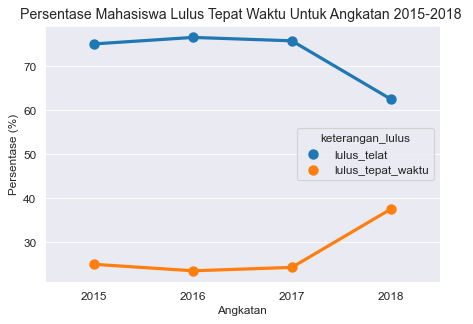

In [374]:
frame=[df2010_15.reset_index()[df2010_15.reset_index()['ANGKATAN']=='2015'],mudel16,mudel17,mudel18]
df10_18=pd.concat(frame)
sns.pointplot(data=df10_18,y='pres(%)',x='ANGKATAN',hue='keterangan_lulus')
plt.title('Persentase Mahasiswa Lulus Tepat Waktu Untuk Angkatan 2015-2018 ')
plt.xlabel('Angkatan')
plt.ylabel('Persentase (%)')
plt.show()

In [375]:
df10_18['model']='logistik'

In [376]:
df10_18

,ANGKATAN,keterangan_lulus,count,pres(%),model
10,2015,lulus_telat,72,75.000000,logistik
11,2015,lulus_tepat_waktu,24,25.000000,logistik
0,2016,lulus_telat,65,76.470588,logistik
1,2016,lulus_tepat_waktu,20,23.529412,logistik
0,2017,lulus_telat,81,75.700935,logistik
1,2017,lulus_tepat_waktu,26,24.299065,logistik
0,2018,lulus_telat,90,62.500000,logistik
1,2018,lulus_tepat_waktu,54,37.500000,logistik


In [377]:
def mud(lah):
    
    df_time=df_summk.copy(deep=True)
    df_time=df_time.merge(df_ori[['NIM','ANGKATAN']],on='NIM',how='left')
    df_time.drop_duplicates(inplace=True)
    df_time=df_time[df_time.ANGKATAN.isin(['2016'])]
    mapping={'lulus_tepat_waktu':1,'lulus_lebih_cepat':1,'lulus_telat':0,'belum_lulus':0}
    df_time['keterangan_lulus']=df_time['keterangan_lulus'].replace(mapping)
    df_time['DEF_2sks']=df_time['D_2sks']+df_time['E_2sks']+df_time['F_2sks']
    df_time['DEF_3sks']=df_time['D_3sks']+df_time['E_3sks']+df_time['F_3sks']
    df_time['DE_4sks']=df_time['D_4sks']+df_time['E_4sks']
    train=scaler.transform(df_time.drop(columns=['NIM','Banyak_Matkul','SEMESTER_LAST','keterangan_lulus','ANGKATAN','D_2sks','E_2sks','F_2sks','D_3sks','E_3sks','F_3sks','D_4sks','E_4sks'],axis=1))

    mudel16=pd.DataFrame({'NIM':df_time['NIM'],'keterangan_lulus':lah.predict(train)})
    mapping={0:'lulus_telat',1:'lulus_tepat_waktu'}
    mudel16['keterangan_lulus']=mudel16['keterangan_lulus'].replace(mapping)
    mudel16['ANGKATAN']=2016
    mudel16= mudel16.groupby(['ANGKATAN','keterangan_lulus']).count()
    mudel16.rename(columns={'NIM':'count'},inplace=True)
    mudel16['pres(%)']=mudel16.groupby(level=0).apply(lambda x: 100*x/float(x.sum()))
    mudel16=mudel16.reset_index()
    df_time=df_summk.copy(deep=True)
    df_time=df_time.merge(df_ori[['NIM','ANGKATAN']],on='NIM',how='left')
    df_time.drop_duplicates(inplace=True)
    df_time=df_time[df_time.ANGKATAN.isin(['2017'])]
    mapping={'lulus_tepat_waktu':1,'lulus_lebih_cepat':1,'lulus_telat':0,'belum_lulus':0}
    df_time['keterangan_lulus']=df_time['keterangan_lulus'].replace(mapping)
    df_time['DEF_2sks']=df_time['D_2sks']+df_time['E_2sks']+df_time['F_2sks']
    df_time['DEF_3sks']=df_time['D_3sks']+df_time['E_3sks']+df_time['F_3sks']
    df_time['DE_4sks']=df_time['D_4sks']+df_time['E_4sks']
    train=scaler.transform(df_time.drop(columns=['NIM','Banyak_Matkul','SEMESTER_LAST','keterangan_lulus','ANGKATAN','D_2sks','E_2sks','F_2sks','D_3sks','E_3sks','F_3sks','D_4sks','E_4sks'],axis=1))

    mudel17=pd.DataFrame({'NIM':df_time['NIM'],'keterangan_lulus':lah.predict(train)})
    mapping={0:'lulus_telat',1:'lulus_tepat_waktu'}
    mudel17['keterangan_lulus']=mudel17['keterangan_lulus'].replace(mapping)
    mudel17['ANGKATAN']=2017
    mudel17= mudel17.groupby(['ANGKATAN','keterangan_lulus']).count()
    mudel17.rename(columns={'NIM':'count'},inplace=True)
    mudel17['pres(%)']=mudel17.groupby(level=0).apply(lambda x: 100*x/float(x.sum()))
    mudel17=mudel17.reset_index()
    df_time=df_summk.copy(deep=True)
    df_time=df_time.merge(df_ori[['NIM','ANGKATAN']],on='NIM',how='left')
    df_time.drop_duplicates(inplace=True)
    df_time=df_time[df_time.ANGKATAN.isin(['2018'])]
    mapping={'lulus_tepat_waktu':1,'lulus_lebih_cepat':1,'lulus_telat':0,'belum_lulus':0}
    df_time['keterangan_lulus']=df_time['keterangan_lulus'].replace(mapping)
    df_time['DEF_2sks']=df_time['D_2sks']+df_time['E_2sks']+df_time['F_2sks']
    df_time['DEF_3sks']=df_time['D_3sks']+df_time['E_3sks']+df_time['F_3sks']
    df_time['DE_4sks']=df_time['D_4sks']+df_time['E_4sks']
    train=scaler.transform(df_time.drop(columns=['NIM','Banyak_Matkul','SEMESTER_LAST','keterangan_lulus','ANGKATAN','D_2sks','E_2sks','F_2sks','D_3sks','E_3sks','F_3sks','D_4sks','E_4sks'],axis=1))

    mudel18=pd.DataFrame({'NIM':df_time['NIM'],'keterangan_lulus':lah.predict(train)})
    mapping={0:'lulus_telat',1:'lulus_tepat_waktu'}
    mudel18['keterangan_lulus']=mudel18['keterangan_lulus'].replace(mapping)
    mudel18['ANGKATAN']=2018
    mudel18= mudel18.groupby(['ANGKATAN','keterangan_lulus']).count()
    mudel18.rename(columns={'NIM':'count'},inplace=True)
    mudel18['pres(%)']=mudel18.groupby(level=0).apply(lambda x: 100*x/float(x.sum()))
    mudel18=mudel18.reset_index()
    frame=[df2010_15.reset_index()[df2010_15.reset_index()['ANGKATAN']=='2015'],mudel16,mudel17,mudel18]
    df10_18=pd.concat(frame)
    if lah==logmodel:
        df10_18['model']='logistik'
    elif lah==dtree:
        df10_18['model']='dcc_tree'
    elif lah==rfc:
        df10_18['model']='rfc'
    elif lah==model:
        df10_18['model']='svc'

    return df10_18

In [378]:
frame=[mud(logmodel),mud(dtree),mud(rfc),mud(model)]
gabun=pd.concat(frame)
gabun

,ANGKATAN,keterangan_lulus,count,pres(%),model
10,2015,lulus_telat,72,75.000000,logistik
11,2015,lulus_tepat_waktu,24,25.000000,logistik
0,2016,lulus_telat,65,76.470588,logistik
1,2016,lulus_tepat_waktu,20,23.529412,logistik
0,2017,lulus_telat,81,75.700935,logistik
1,2017,lulus_tepat_waktu,26,24.299065,logistik
0,2018,lulus_telat,90,62.500000,logistik
1,2018,lulus_tepat_waktu,54,37.500000,logistik
10,2015,lulus_telat,72,75.000000,dcc_tree
11,2015,lulus_tepat_waktu,24,25.000000,dcc_tree


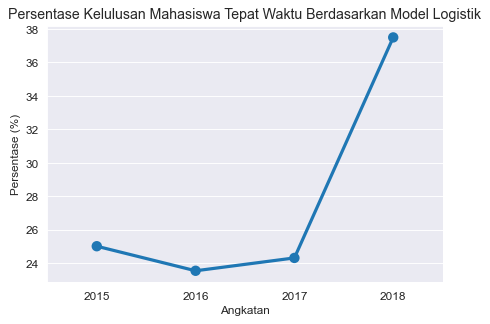

In [382]:
h=gabun[gabun['keterangan_lulus']=='lulus_tepat_waktu']
h=h[h.model=='logistik']
sns.pointplot(data=h,y='pres(%)',x='ANGKATAN')
plt.title('Persentase Kelulusan Mahasiswa Tepat Waktu Berdasarkan Model Logistik')
plt.ylabel('Persentase (%)')
plt.xlabel("Angkatan")
plt.show()